# **Faktor Apakah yang Menjual sebuah Mobil?**

Proses eksplorasi data merupakan hal yang krusial sebelum masuk ke dalam analisis data secara komprehensif. Dalam tahapan eksplorasi data biasanya dimulai dari mendefinisikan masalah, mengumpulkan data yang dibutuhkan, mencari pola dalam distribusi data, dan mengekstrak informasi dari temuan yang didapatkan. Dalam kesempatan saat ini, kita akan melakukan sebuah proyek yang sebagian besar pekerjaan yang akan dilakukan adalah dengan mengeksplor data mengenai faktor apa yang dapat menjual sebuah mobil. Kita akan berperan sebagai seorang analis di Crankshaft List yang diberikan sebuah mandat untuk mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir dengan tujuan utama untuk menentukan faktor-faktor yang dapat memengaruhi harga sebuah kendaraan. Berikut ini merupakan alur dan petunjuk dari tahapan analisis data eksploratif yang akan kita lakukan dalam pengerjaan proyek saat ini:
- Mempelajari beberapa parameter yang tersedia dan menganalisisnya dengan menggunakan histogram seperti harga, usia kendaraan saat iklan tayang, jarak tempuh, jumlah silinder, dan kondisi kendaraan
- Menentukan batas *outlier*, menghapus, dan menyimpannya dalam *dataframe* terpisah
- Membuat histogram dari data yang telah tersaring dan membandingkannya dengan histogram yang berisi *outlier*
- Mempelajari masa berlaku iklan ditayangkan dengan cara menghitung nilai rata-rata dan mediannya serta menentukan dari data tersebut kapan sebuah iklan dihapus dengan cepat dan kapan iklan ditayangkan dalam waktu yang lama
- Melakukan analisis terhadap jumlah iklan dan harga rata-rata setiap jenis kendaraan dengan membuat sebuah grafik yang menyimpulkan ketergantungan jumlah iklan pada jenis kendaraan, dan
- Melihat faktor apa saja yang dapat memengaruhi harga kendaraan dari masing-masing jenis kendaraan populer yang telah didapatkan dalam tahapan sebelumnya. Apakah dipengaruhi berdasarkan usia, jarak tempuh, kondisi, tipe transmisi, dan warna kendaraan? Hal ini dapat dilakukan dengan cara membuat grafik *boxplot* dan *scatterplot*.

Kita juga tidak melupakan tahapan pra-pemrosesan data, mengatasi nilai yang hilang, memperbaiki tipe data, dan memperbaiki kualitas data untuk beberapa kolom sebelum mengeksplor data lebih lanjut dalam proyek ini sehingga kita bisa membandingkan dan menghitung nilai yang dibutuhkan secara mudah. Tanpa berlama-lama, marilah kita memulai pengerjaan proyek ini dengan tahapan awal yang dimulai dalam sub-bab pra-pemrosesan berikut ini.

## Pra-pemrosesan

Tahapan awal yang tidak boleh dilewatkan sebelum melakukan analisis data yaitu dengan cara mengimpor *library* yang dibutuhkan. Untuk pengerjaan proyek ini yang pasti kita membutuhkan Pandas untuk mengelola data dalam *dataset* dan tambahan lainnya yaitu Matplotlib dan Seaborn untuk membuat grafik dalam bagian eksplorasi data. Mari kita mulai mengimpor *library* yang sudah ditentukan sebelumnya.

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Kita sudah mengimpor *library* untuk pengerjaan proyek dalam blok kode sebelumnya dan saatnya kita akan masuk ke dalam tahapan yang lebih lanjut, yaitu eksplorasi data awal.

### Memuat Data

Sebelum masuk dalam tahap eksplorasi data awal, jangan lupa untuk selalu memuat *dataset* terlebih dahulu. Untungnya dalam proyek ini kita sudah diberikan *dataset* yang diperlukan dalam format CSV dan *path* dari datanya.

In [2]:
# Muat file data menjadi DataFrame
dataframe = pd.read_csv(r'/datasets/vehicles_us.csv')

Semua sudah siap dilakukan! Kita telah memuat data untuk proyek saat ini dalam variabel bernama `dataframe`. Selanjutnya kita akan melakukan tahapan awal dalam eksplorasi data yang kita miliki mulai dari melihat informasi umum, mencari tipe data yang salah, dan kolom mana saja yang terdapat nilai hilang.

### Mengeksplorasi Data Awal

Penting bagi seorang data analis untuk terlebih dahulu mengenali informasi mengenai kolom-kolom apa saja yang dimuat dalam *dataset* yang diberikan kepadanya dengan tujuan agar kita bisa menafsir dan menganalisis data dengan baik tanpa adanya misinterpretasi nantinya. Berikut ini adalah *dataset* yang kita miliki berisi kolom-kolom sebagai berikut:

- `price`: harga kendaraan yang telah ditentukan
- `model_year`: usia atau tahun kendaraan diluncurkan
- `model`: nama model kendaraan
- `condition`: kondisi kendaraan saat ini
- `cylinders`: jumlah silinder kendaraan
- `fuel`: jenis bahan bakar kendaraan (gas, disel, dan lain-lain)
- `odometer`: jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`: jenis transmisi kendaraan
- `type`: tipe kendaraan
- `paint_color`: warna kendaraan
- `is_4wd`: apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted`: tanggal iklan ditayangkan
- `days_listed`: jumlah hari iklan ditayangkan hingga dihapus

Setiap kolom yang diberikan mengandung informasi mengenai kendaraan yang ditawarkan dan kapan kendaraan dipasarkan melalui *website*.

Saat ini kita akan menampilkan informasi umum mengenai *dataset* yang kita miliki dengan menggunakan metode `.info()` dan berikut penggalan kode yang telah dibuat.

In [3]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Informasi yang sudah disediakan menceritakan mengenai nama-nama kolom yang ada, jumlah barisnya, tipe datanya, dan juga kapasitas dari *dataset* yang ada. Kita bisa melihat bahwa dalam *dataset* ini memiliki total sebanyak 13 kolom dan 51525 baris dengan indeks yang berurutan. Mari kita melihat sampel dari salah satu baris datanya agar kita bisa memiliki gambaran yang lebih jelas.

In [4]:
# Menampilkan sampel data
dataframe.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
27046,4900,2005.0,toyota tundra,good,8.0,gas,218226.0,automatic,truck,grey,NaN,2018-05-04,26


Sampel dari *dataset* ditemukan dalam salah satu baris yang acak dan setiap diperbarui indeksnya akan terus berubah. Sepertinya kita dapat menduga bahwa dalam *dataset* ini memang memiliki nilai yang hilang dalam beberapa kolom. Kita akan membuktikannya dalam beberapa bagian blok kode selanjutnya. Kita akan mencari keanehan lain dalam *dataset* ini dengan memanggil metode `.describe()`.

In [5]:
# Menampilkan statistik kolom numerik
dataframe.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Perlu diingat bahwa metode `.describe()` hanya menjelaskan statistik deskriptif dari kolom yang sifatnya numerik dan dalam *dataset* kita saat ini terdapat 6 kolom numerik. Berikut ini yang dapat kita jelaskan dari hasil di atas:
- **Nilai minimal dari kolom `price` adalah 1**. Apakah hal ini merupakan suatu nilai yang benar? Mengingat harga kendaraan hanya senilai 1 saja dapat dikatakan tidak masuk akal sehingga kita dapat menganggapnya sebagai suatu **anomali**
- **Nilai minimal dari kolom `odometer` adalah 0**. Apakah ada suatu kendaraan yang belum pernah dipakai sama sekali sehingga kita bisa menganggapnya sebagai kendaraan baru yang belum pernah dipakai? Kita tidak dapat mengetahuinya secara pasti, tetapi yang pasti kendaraan tersebut **tidak dapat diklasifikasikan sebagai kendaraan bekas** (sudah pernah dipakai)
- Standar deviasi dari kedua kolom, yaitu `price` dan `odometer` memiliki nilai yang tergolong tinggi. Sehingga kita dapat berasumsi bahwa dalam kedua kolom tersebut **mungkin terdapat banyak nilai pencilan**.

Sekarang kita akan melihat apakah terdapat suatu kesalahan mengenai tipe data dalam suatu kolom di dalam *dataset*  saat ini. Mari kita buktikan sekarang.

In [6]:
# Memeriksa tipe data setiap kolom
dataframe.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Ternyata setelah kita periksa, terdapat beberapa kolom yang memiliki tipe data yang tidak seharusnya. Hasil dari pemeriksaan tipe data sebenarnya dapat kita rujuk juga dalam metode `.info()` yang sudah ditampilkan sebelumnya. Berikut ini merupakan kolom-kolom yang memiliki kesalahan tipe data beserta solusinya:
- `price`: seharusnya untuk kolom ini lebih baik tipe datanya adalah ***float*** dibandingkan dengan *integer* karena bilangan dari suatu harga nilainya bisa saja tidak bulat
- `model_year`: tahun merupakan angka bulat, **bukan** angka pecahan seperti tipe data yang ada dalam kolom ini. Oleh karena itu kita perlu untuk mengubahnya menjadi ***integer***
- `cylinders`: jika kita sepenuhnya mengetahui apa itu silinder mobil, maka kita akan tahu bahwa jumlah silinder mobil itu nilainya bulat. Sebagai informasi saja, jumlah silinder mobil umumnya ada 3, 4, 6, 8, 10, 12, dan 16 silinder. Melalui informasi tersebut kita perlu mengubah tipe datanya menjadi ***integer***
- `is_4wd`: sebenarnya tidak ada yang salah dengan tipe data dalam kolom ini. Sebagai informasi untuk nilai 0 mengartikan bahwa kendaraan tidak beroda empat sedangkan untuk nilai 1 adalah sebaliknya. Demi kemudahan analisis dan eksplorasi ke depannya, kita sebaiknya mengubah tipe data dalam kolom ini mejadi ***boolean*** bukan *float*
- `date_posted`: tipe data dalam kolom ini adalah *object* sedangkan dalam kolom ini memuat data mengenai tanggal iklan ditayangkan. Sehingga tipe datanya tidaklah benar dan kita akan merubahnya menjadi ***datetime***.

Kita sudah melakukan pengecekan terhadap tipe data dalam setiap kolom dan saat ini kita akan melihat kolom mana saja yang terdapat nilai yang hilang dan berapa besar persentasenya. Mari kita lakukan sekarang di bawah ini.

In [7]:
# Memeriksa persentase jumlah nilai hilang dalam setiap kolom
dataframe.isnull().sum().sort_values(ascending=False) / len(dataframe) * 100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

Sebenarnya kita juga dapat mengetahui adanya nilai hilang dalam bagian sebelumnya saat kita memanggil metode `.info()` dalam menampilkan informasi umum dari *dataset* ini. Seperti yang sudah tertera dalam hasil eksekusi kode di atas, kita dapat melihat **ada 5 kolom yang terdapat nilai hilang** yaitu `is_4wd`, `paint_color`, `odometer`, `cylinders`, dan `model_year`. Dalam urutan persentase nilai hilang terbesar hingga terkecil, **kolom `is_4wd` memiliki jumlah nilai hilang yang terbanyak** dengan persentase sebesar **50.36%** atau setengah dari jumlah baris dalam kolom ini nilainya kosong.

### Kesimpulan dan Langkah-Langkah Selanjutnya

Sampai saat ini kita sudah melakukan eksplorasi data awal yang ada dalam *dataset* yang belum dirubah sama sekali dengan tujuan untuk mencari informasi umum, nilai anomali, nilai yang hilang, dan tipe data yang tidak tepat. Sejauh ini ada beberapa kolom yang memang terdapat anomali dalam tipe datanya dan nilai yang tidak lengkap. Berikut ini merupakan kesimpulan dari tahap eksplorasi data awal yang telah dilakukan beserta dengan aksi yang akan kita ambil untuk tahapan selanjutnya.

**Kemungkinan adanya *outlier***

Setelah melihat statistik deskriptif dari penggunaan metode `.describe()`, kita dapat merujuk pada nilai standar deviasi untuk kolom `price` dan `odometer` memiliki nilai yang besar. Oleh karena itu kita menganggap dalam kedua kolom tersebut terdapat adanya pencilan atau *outlier*. Sehingga dalam tahapan eksplorasi nantinya akan lebih baik jika kita **menghitung nilai rata-rata**, khususnya untuk kedua kolom tersebut **menggunakan nilai median**. Mengenai bagian ini kita akan membahasnya lebih rinci dalam bagian 1.7 mengenai mempelajari dan menangani *outlier*.

**Tipe data yang aneh**

Kita sudah menemukan 5 kolom dengan tipe data yang tidak seharusnya dimiliki oleh kolom-kolom tersebut. Jika kita melihat lagi dari apa yang sudah ditemukan, nama-nama kolom yang tipe datanya tidak sesuai adalah `price`, `model_year`, `cylinders`, `is_4wd`, dan `date_posted`. Kita akan mengganti tipe data tersebut sesuai dengan yang telah kita tentukan dalam bagian 1.3 yaitu memperbaiki tipe data.

**Nilai hilang**

Seperti yang sudah kita temukan dan identifikasi, bahwa dalam *dataset* proyek ini terdapat nilai hilang dalam beberapa kolom, yaitu `is_4wd`, `paint_color`, `odometer`, `cylinders`, dan `model_year`. Keputusan yang akan kita lakukan adalah dengan **mengisi nilai yang hilang menggunakan nilai rata-ratanya** menggunakan bantuan fungsi buatan. Khusus untuk kolom `paint_color` kita tidak akan mengubahnya menggunakan rata-rata karena kolom tersebut merupakan kolom dengan nilai non-numerik, tetapi kita akan menggunakan cara lain. Begitupun untuk kolom `is_4wd` kita tidak akan mencari nilai rata-ratanya karena kolom tersebut hanya mengandung nilai antara 0 dan 1. Masalah ini akan kita selesaikan dalam tahapan selanjutnya, yaitu dalam bagian mengatasi nilai-nilai yang hilang.

## Mengatasi Nilai-Nilai yang Hilang

Tiba saatnya untuk kita melakukan perubahan nilai-nilai yang hilang dalam beberapa kolom. Untuk pengisian nilai hilang akan kita lakukan secara terstruktur untuk masing-masing kolom dengan menggunakan bantuan fungsi buatan atau menggunakan alternatif khusus untuk kolom-kolom tertentu. Untuk kolom selain `is_4wd` dan `paint_color`, sebelum mengisi nilai hilang kita akan terlebih dahulu mencari opsi terbaik pengisian nilai hilang antara menggunakan *mean* atau *median*.

Berbicara mengenai nilai yang hilang dalam *dataset* saat ini, kita dapat melihat bahwa (lihat dalam persentase jumlah nilai hilang sebelumnya) persentase jumlah nilai hilang dalam setiap kolom memiliki jumlah yang berbeda. oleh karena itu kita dapat mengatakan bahwa nilai yang hilang tidak terdapat pola sama sekali dan hilangnya terjadi secara acak oleh karena faktor tertentu mulai dari pengisian data yang tidak perlu untuk diisi (opsional) dalam beberapa kolom tertentu dan kesalahan teknis saat proses ETL berjalan.

### Mengatasi Nilai Hilang dalam Kolom `is_4wd`

Sekarang kita akan memperbaiki nilai-nilai yang hilang dalam kolom ini dengan cara menentukan terlebih dahulu dengan nilai apakah kita akan mengisinya. Marilah kita memulainya dengan mengecek nilai apa saja yang terkandung dalam kolom ini (mengingat bahwa kolom ini hanya memuat nilai antara 0 dan 1).

In [8]:
# Melihat nilai-nilai yang terkandung dalam kolom `is_4wd`
dataframe['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

Ternyata dalam kolom `is_4wd` ini **hanya berisikan nilai 1** atau kondisi *boolean* yaitu *True*. Dengan kata lain sebanyak 25572 baris dalam kolom ini merupakan kendaraan roda empat dan sisanya tidak diketahui atau kosong. Asumsi kita bahwa untuk nilai kosong ini bisa saja disebabkan oleh kesalahan teknis atau kolomnya yang tidak wajib untuk diisi sehingga nilai kosong bisa saja muncul.

Khusus untuk kasus nilai hilang dalam kolom ini, sebenarnya terdapat cara eksplisit untuk mengganti nilai yang hilang. Kita dapat berasumsi bahwa nilai-nilai yang hilang dalam kolom ini adalah nilai yang *False* atau kebalikan dari kumpulan nilai-nilai *True* yang ada saat ini. Maka dari pernyataan tersebut, masuk akal bagi kita dapat **mengisi nilai yang hilang khusus untuk kolom *Boolean* saat ini dengan nilai 0 atau *False***.

In [9]:
# Mengisi nilai yang hilang dengan kondisi nilai Boolean yang *False* untuk kolom ini
dataframe['is_4wd'] = dataframe['is_4wd'].fillna(0)

Setelah kita melakukan sebuah keputusan untuk mengisi nilai hilang khusus kolom ini, kita langsung menerapkannya dengan mengisi nilai hilang menggunakan kondisi nilai 0 atau *False* dan menyimpan kembali hasilnya dalam kolom ini. Sekarang mari kita kembali melakukan pemeriksaan apakah nilainya sudah terisi dan tidak ada nilai yang hilang atau sebaliknya.

In [10]:
# Memeriksa kembali distribusi nilai setelah melakukan pengisian nilai yang hilang
dataframe['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

Ternyata hasilnya sudah sesuai dengan yang kita harapkan. Setengah persen dari jumlah baris yang hilang dalam kolom ini sudah terisi dengan nilai 0 Jikalau kedua nilai tersebut ditambahkan, maka akan menghasilkan jumlah keseluruhan baris yang ada dalam *dataset* kita saat ini.

### Mengatasi Nilai Hilang dalam Kolom `paint_color`

Saatnya kita untuk mengisi nilai yang hilang di dalam kolom `paint_color`. Seperti yang sudah dijelaskan sebelumnya bahwa untuk pengisian nilai hilang khusus kolom ini tidak bisa menggunakan nilai rata-rata karena nilai-nilai yang terkandung dalam kolom ini merupakan non-numerik. Sehingga ada cara lain yang lebih mudah untuk kita lakukan, yaitu dengan menentukan nilai terbaik apakah yang akan diisi untuk menggantikan nilai kosong.

In [11]:
# Memeriksa distribusi nilai dalam kolom ini
dataframe['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

Bukankah sebuah kebingungan besar bagi kita untuk mengisi nilai hilang dengan nilai rata-rata seperti hasil distribusi nilai dalam kolom saat ini? Jawabannya tentu ya dan tidak mungkin. Apakah baik jikalau kita mengisinya dengan nilai *white* karena nilai tersebut paling banyak ditemukan? Jawabannya tentu tidak karena kita tidak dapat mengetahuinya secara pasti nilai-nilai yang hilang ini memiliki warna kendaraan seperti apa dan jikalau kita menerapkannya tentu hasilnya tidak akan representatif. Melalui pernyataan tersebut, kita dapat **mengklasifikasikan nilai-nilai yang hilang** dalam kolom ini ke dalam suatu nilai bernama ***unknown*** atau tidak diketahui.

In [12]:
# Menganti nilai hilang dengan nilai baru bernama `unknown`
dataframe['paint_color'] = dataframe['paint_color'].fillna('unknown')

Perubahan sudah berhasil dilakukan dan telah disimpan kembali dalam kolom yang sama. Nilai-nilai kosong sudah diisikan dengan nilai baru yang diteruskan dalam metode `.fillna()` dan oleh karena itu mari kita melihat apakah masih ada nilai hilang dalam kolom ini atau tidak ada lagi.

In [13]:
# Memeriksa kembali nilai hilang dalam kolom saat ini
dataframe.isnull().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Hasilnya sudah sesuai dengan rencana kita! Nilai-nilai kosong terlihat tidak nampak lagi setelah kita mengisinya.

### Mengatasi Nilai Hilang dalam Kolom `odometer`

Sekarang kita akan melakukan pengisian nilai hilang dalam kolom ini dengan menggunakan cara yang berbeda seperti yang telah kita lakukan sebelumnya. Lebih tepatnya pengisian kolom ini sedikit lebih kompleks dengan mencari terlebih dahulu dengan nilai apakah yang terbaik yang akan kita isi, yaitu antara `.mean()` dan `.median()`.

**Catatan**

Sedikit *notes* untuk pengerjaan nilai yang hilang untuk kolom numerik seperti saat ini dan pada kolom `cylinders` dan `model_year` prosesnya sama saja dengan cara membandingkan terlebih dahulu nilai rata-ratanya menggunakan metode `.mean()` dan `median()`, mengisi kolomnya dengan bantuan fungsi buatan, dan menerapkan perubahan nilai hilang ke dalam kolomnya kembali.

Pertama kali yang harus kita lakukan terlebih dahulu yaitu membuat variabel baru yang hanya memuat nilai tanpa adanya nilai hilang dalam kolom `odometer`. Mari kita kerjakan di bawah ini.

In [14]:
# Menyaring data tanpa nilai hilang dalam kolom ini
not_null_odometer = dataframe[dataframe['odometer'].notnull()].reset_index(drop=True)

Tujuan dari menyaring data tanpa nilai hilang adalah untuk mencari tahu nilai rata-rata yang asli tanpa terpengaruh dengan nilai yang hilang yang dapat mengaburkan hasil rata-ratanya. Itu merupakan hal yang tidak kita inginkan dan langkah selanjutnya yaitu mari kita membandingkan nilai rata-ratanya seperti yang sudah kita sebutkan di atas.

**Catatan**

Sebuah peringatan yang perlu kita sertakan dalam pengisian nilai hilang saat ini dan kedepannya, kita tidak akan serta-merta mengisi nilai yang hilang mentah-mentah dengan menerapkan hasil nilai rata-rata dalam kolom ini ke semua baris yang nilainya hilang. Misalkan hasil dari penerapan rata-rata dari kode `dataframe['odometer'].mean()` hasilnya 115533, kalau kita terapkan hasilnya maka hasilnya akan sama dan tidak representatif. Oleh karena itu, kita akan **melakukan pengisian nilai hilang dengan menggunakan suatu kondisi dengan kolom lain**. Jadi kita akan menggunakan salah satu kolom dalam *dataset* ini untuk mencari nilai rata-ratanya dan mengisinya dengan bantuan fungsi. Mari kita terlebih dahulu mencari perbedaan nilai rata-rata antara `.mean()` dan `.median()`.

In [15]:
# Melihat nilai mean untuk jarak tempuh berdasarkan faktor yang telah kita tentukan
not_null_odometer.groupby('condition')['odometer'].mean()

condition
excellent    106687.682258
fair         183062.233577
good         129919.930980
like new      79426.738166
new           43476.056000
salvage      140919.989796
Name: odometer, dtype: float64

Kita telah menentukan kondisi nilai `.mean()` dari kolom ini dengan kolom `condition`. Cara membaca hasil dari nilai rata-rata di atas yaitu contohnya untuk kondisi kendaraan yang *excellent* memiliki rata-rata jarak tempuh kendaraan sebesar 106687.6. Jikalau dilihat juga hasilnya nampak cukup besar dan selanjutnya kita akan melakukan cara yang sama dengan metode berbeda, yaitu dengan `.median()`.

In [16]:
# Melihat nilai median untuk jarak tempuh berdasarkan faktor yang telah kita tentukan
not_null_odometer.groupby('condition')['odometer'].median()

condition
excellent    104230.0
fair         181613.0
good         129000.0
like new      72982.5
new            8002.0
salvage      142673.5
Name: odometer, dtype: float64

Sepertinya hasilnya juga tidak cukup berbeda dengan nilai rata-rata menggunakan *mean*. Tetapi setidaknya untuk nilai *median* saat ini jumlahnya sedikit lebih kecil. Berdasarkan keputusan yang akan kita ambil, **pengisian nilai hilang dalam kolom ini akan menggunakan nilai *median*** yang sudah didapatkan karena nilai *median* lebih *robust* digunakan ketika adanya nilai *outlier*, khususnya untuk kolom ini.

Sehingga langkah selanjutnya kita akan membuat sebuah fungsi pengisian nilai hilang secara kondisional dengan kolom lain yang telah kita pilih, yaitu kolom `condition` sebagai agregatnya. Ingat, pengisian nilai hilang dilakukan dengan cara mengecek nilai dari kolom agregat yang telah dipilih dan mengisinya dengan nilai median dari kolom agregat ke dalam nilai yang hilang. Contohnya, jika nilai yang hilang dalam kolom `odometer` adalah kondisi kendaraannya *fair*, maka nilai hilangnya akan diisi oleh nilai median dari kondisi kendaraan tersebut.

In [17]:
# Membuat fungsi yang akan digunakan untuk mengisi nilai yang hilang menggunakan median
def fill_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

Pembuatan fungsi untuk mengisi nilai hilang dalam kolom `odometer` sudah dilakukan dan dapat dijalankan. Untuk tahapan selanjutnya yaitu kita hanya perlu untuk memanggil fungsi yang baru saja kita buat dan menerapkannya ke dalam baris yang memiliki nilai hilang di kolom `odometer`.

In [18]:
# Terapkan fungsi tersebut ke setiap baris
dataframe = fill_missing_value(dataframe, 'condition', 'odometer')

Penerapan fungsi ke dalam setiap baris yang nilainya hilang sudah selesai. Perlu untuk diketahui kembali bahwa pengisian nilai hilang dalam kolom ini berdasarkan dari kolom `condition`. Tahap akhir dalam pengisian nilai hilang untuk kolom ini yaitu kita akan memeriksa apakah masih terdapat nilai yang hilang atau tidak.

In [19]:
# Memeriksa kembali nilai hilang dalam kolom ini
dataframe.isnull().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Pada akhirnya kita dapat mengisi nilai hilang dalam kolom `odometer` ini dengan baik yang dapat dibuktikan bahwa tidak ada lagi nilai yang hilang untuk kolom tersebut. Dengan begitu kita dapat lanjut mengisi nilai hilang untuk kolom selanjutnya.

### Mengatasi Nilai Hilang dalam Kolom `cylinders`

Pengisian nilai hilang untuk kolom ini sebenarnya sama seperti tahapan sebelumnya yang telah kita lakukan dalam kolom `odometer`. Pertama kali kita perlu untuk mencari nilai rata-rata antara `.mean()` dan `.median()`. Seperti biasa kita akan melakukan penyaringan tanpa nilai hilang untuk kolom ini terlebih dahulu dan menyimpannya dalam variabel baru.

In [20]:
# Menyaring data tanpa nilai hilang dalam kolom ini
not_null_cylinders = dataframe[dataframe['cylinders'].notnull()].reset_index(drop=True)

Pembuatan variabel baru tanpa nilai hilang tampaknya sudah berhasil. Sekarang saatnya bagi kita untuk membandingkan nilai rata-rata antara menggunakan *mean* atau *median* dengan salah satu kolom dari *dataset* saat ini.

In [21]:
# Melihat nilai mean untuk jumlah silinder berdasarkan faktor yang telah kita tentukan
not_null_cylinders.groupby('model')['cylinders'].mean()

model
acura tl             5.971564
bmw x5               6.406375
buick enclave        6.000000
cadillac escalade    7.986395
chevrolet camaro     6.887097
                       ...   
toyota sienna        5.952381
toyota tacoma        5.345205
toyota tundra        7.919561
volkswagen jetta     4.281116
volkswagen passat    4.325949
Name: cylinders, Length: 100, dtype: float64

Kolom agregat yang kita gunakan saat ini sebagai referensi untuk mengisi nilai yang hilang adalah dari kolom `model`, karena setiap model kendaraan memiliki jumlah silinder yang berbeda. Kita belum bisa mengetahui apakah nilai rata-rata menggunakan *mean* ini lebih kecil dibandingkan dengan *median*. Selanjutnya kita akan melakukan hal yang sama dengan memanggil metode `.median()` dan membandingkannya.

In [22]:
# Melihat nilai median untuk jumlah silinder berdasarkan faktor yang telah kita tentukan
not_null_cylinders.groupby('model')['cylinders'].median()

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64

Ternyata hasilnya sama saja dan perbedaannya sangat kecil. Itu menandakan bahwa dalam kolom ini mungkin tidak memiliki pencilan yang banyak dan hal ini bisa kita rujuk kembali dalam pemanggilan metode `.describe()` pada tahap eksplorasi data awal bahwa nilai standar deviasi untuk kolom ini memang kecil. Keputusannya adalah kita akan tetap **menggunakan nilai *median* untuk mengisi nilai yang hilang** karena nilai ini akan lebih aman jika digunakan untuk mengisi nilai yang hilang dan alasan lainnya adalah nilai dari *mean* tidak bulat. Langkah selanjutnya adalah dengan mengisi nilai yang hilang menggunakan fungsi pengisian nilai hilang kondisional dengan kolom `model`, caranya serupa dengan tahapan sebelumnya.

In [23]:
# Membuat fungsi yang akan digunakan untuk mengisi nilai yang hilang menggunakan median
def fill_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

Fungsi di atas sebenarnya hanya perlu kita salin kembali karena pengisian nilai hilang sama saja untuk kolom numerik. Selanjutnya kita hanya perlu memanggil kembali fungsi di atas dan menerapkannya dalam kolom `cylinders` yang saat ini memiliki *missing value*.

In [24]:
# Menerapkan fungsi di atas ke setiap baris
dataframe = fill_missing_value(dataframe, 'model', 'cylinders')

Pengisian nilai hilang untuk kolom saat ini sudah berhasil dilaksanakan. Sekarang mari kita buktikan kembali apakah masih ada nilai yang hilang atau tidak.

In [25]:
# Memeriksa kembali nilai hilang dalam kolom ini
dataframe.isnull().sum()

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Pada akhirnya semua sudah dilakukan dengan beres! Kolom `cylinders` yang sebelumnya kita lihat memiliki sebanyak 5260 nilai yang hilang dan saat ini jumlahnya sudah menjadi 0. Itu artinya tinggal satu kolom lagi yang perlu kita bereskan.

### Mengatasi Nilai Hilang dalam Kolom `model_year`

Bagian ini merupakan tahapan akhir dalam mengisi nilai hilang dan untuk saat ini kita akan fokus dalam kolom `model_year`. Seperti yang sudah dijelaskan pada awal bagian sub-bab pengerjaan ini, langkah pengerjaannya sama dengan pengisian nilai hilang dalam kolom `odometer` dan `cylinders`. Pertama kita harus menyaring data tanpa nilai yang hilang.

In [26]:
# Menyaring data tanpa nilai hilang dalam kolom ini
not_null_model_year = dataframe[dataframe['model_year'].notnull()].reset_index(drop=True)

*Dataset* tanpa nilai hilang dalam kolom ini sudah disimpan dalam variabel `not_null_model_year`. Kedua, kita akan membandingkan nilai rata-rata antara *mean* dan *median* dengan menggunakan salah satu kolom.

In [27]:
# Melihat nilai mean untuk tahun kendaraan berdasarkan faktor yang telah kita tentukan
not_null_model_year.groupby('model')['model_year'].mean()

model
acura tl             2007.517857
bmw x5               2008.991870
buick enclave        2012.194553
cadillac escalade    2008.508475
chevrolet camaro     2008.397959
                        ...     
toyota sienna        2008.584416
toyota tacoma        2009.331599
toyota tundra        2009.350352
volkswagen jetta     2010.779381
volkswagen passat    2011.253086
Name: model_year, Length: 100, dtype: float64

Penentuan nilai *mean* saat ini dilakukan bersama dengan kolom `model`. Di atas terkandung nilai rata-rata tahun kendaraan menggunakan *mean* berdasarkan masing-masing model kendaraan. Selanjutnya mari kita lihat dan bandingkan dengan nilai rata-rata untuk kolom ini menggunakan *median*.

In [28]:
# Melihat nilai median untuk tahun kendaraan berdasarkan faktor yang telah kita tentukan
not_null_model_year.groupby('model')['model_year'].median()

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

Sama seperti kolom `cylinders`, nilai *median* dalam kolom ini jika dibandingkan dengan nilai *mean* sebenarnya perbedaanya sangat tipis. Sehingga keputusan yang akan kita pakai untuk **mengisi nilai yang hilang dalam kolom ini adalah dengan menggunakan nilai *median*** karena tetap saja dalam kolom ini kita bisa melihat adanya *outlier* jika kita merujuk pada nilai standar deviasi dalam bagian eksplorasi data awal. Kembali lagi kita akan menggunakan fungsi pengisian nilai hilang kondisional bersama dengan kolom `model`.

In [29]:
# Membuat fungsi yang akan digunakan untuk mengisi nilai yang hilang menggunakan median
def fill_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

Sebenarnya untuk fungsi di atas sama saja dengan pengisian dua kolom sebelumnya dan kita hanya perlu menyalinnya lagi. Setelah ini kita akan memanggil fungsi yang ada dan menerapkannya ke dalam baris-baris yang memiliki nilai dalam kolom `model_year` dengan kolom agregatnya yaitu `model`.

In [30]:
# Menerapkan fungsi di atas ke setiap baris
dataframe = fill_missing_value(dataframe, 'model', 'model_year')

Kembali mengingatkan bahwa pengisian nilai hilang dalam kolom ini berdasarkan dari kolom `model`. Maksudnya setiap nilai hilang akan diperiksa berdasarkan nama kendaraan dan ketika cocok nilai kosong tersebut akan diisi dengan median yang sesuai dengan nama model kendaraannya. Pada akhirnya kita akan mengecek apakah masih terdapat nilai hilang dalam kolom ini atau tidak.

In [31]:
# Memeriksa kembali nilai hilang dalam kolom ini
dataframe.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Terlihat bagus! Kita dapat melihat bahwa dalam kolom ini sudah tidak ada lagi nilai yang hilang dan untuk keseluruhan kolom dalam *dataset* kita sudah terisi semua baris-barisnya.

## Memperbaiki Tipe Data

Perbaikan tipe data juga merupakan hal yang penting untuk dilakukan sebelum masuk dalam eksplorasi data. Dalam tahapan ini kita hanya dituntut untuk melakukan perubahan tipe data dengan langkah yang sederhana untuk beberapa kolom yang tipe datanya tidak tepat. Berikut ini kita lampirkan kembali kolom-kolom yang tipe datanya akan kita perbaiki dan statusnya saat ini:
- `price`: tipe datanya adalah *integer*
- `model_year`: tipe datanya adalah *float*
- `cylinders`: tipe datanya adalah *float*
- `is_4wd`: tipe datanya adalah *float*
- `date_posted`: tipe data dalam kolom ini adalah *object*.

Mari kita lakukan perubahan untuk kolom-kolom tersebut secara berurutan.

### Perbaikan Tipe Data untuk Beberapa Kolom

Untuk saat ini kita akan merubah tipe data dalam kolom `price` yang sebelumnya yaitu `integer` akan dirubah menjadi `float`. Mari kita kerjakan saat ini.

In [32]:
# Mengubah tipe data dalam kolom `price` menjadi `float`
dataframe['price'] = dataframe['price'].astype('float')

Kerja yang baik sudah kita lakukan dalam kolom `price`. Mari kita lakukan kembali cara yang sama untuk kolom `model_year` yang sebelumnya tipe datanya adalah `float` akan dirubah menjadi `integer`.

In [33]:
# Mengubah tipe data dalam kolom `model_year` menjadi `integer`
dataframe['model_year'] = dataframe['model_year'].astype('int')

Kerja yang bagus! Sekarang kita akan beralih ke kolom `cylinders`. Kolom tersebut akan dirubah tipe datanya menjadi `integer`.

In [34]:
# Mengubah tipe data dalam kolom `cylinders` menjadi `integer`
dataframe['cylinders'] = dataframe['cylinders'].astype('int')

Merubah tipe data merupakan tahapan yang sederhana. Lanjutan pekerjaan kita saat ini akan merubah tipe data dalam kolom `is_4wd` yang sebelumnya adalah `float` menjadi `boolean`.

In [35]:
# Mengubah tipe data dalam kolom `is_4wd` menjadi `integer`
dataframe['is_4wd'] = dataframe['is_4wd'].astype('bool')

Sekarang untuk tahap akhir kita akan melakukan perubahan tipe data untuk kolom `date_posted` yang sebelumnya adalah `object` menjadi tipe data tanggal yang sesuai yaitu `datetime`. Cara merubahnya untuk kolom ini cukup berbeda dengan tahapan-tahapan perubahan tipe data sebelumnya.

In [36]:
# Mengubah tipe data dalam kolom `date_posted` menjadi `datetime`
dataframe['date_posted'] = pd.to_datetime(dataframe['date_posted'])

Pada akhirnya kita telah melakukan perubahan tipe data dalam kolom-kolom di atas menjadi yang seharusnya. Untuk lebih jelas mari kita akan melihat isi sampel data dalam *dataset* kita saat ini setelah melakukan perubahan tipe data.

In [37]:
# Menampilkan sampel data
dataframe.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500.0,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


Semua sudah terlihat jelas perubahannya. Untuk kolom `model_year` dan `cylinders` yang sebelumnya terdapat angka di belakang koma (bentuk pecahan) telah menjadi angka bulat seperti yang kita harapkan, begitu juga untuk kolom `price`sebaliknya. Kolom `is_4wd` sudah berubah juga tipe datanya menjadi *boolean* agar mempermudah interpretasi data dalam kolom tersebut. Sekarang mari kita laporkan kesimpulan kita selanjutnya mengenai perubahan tipe data yang sudah dilakukan dengan lebih jelas.

### Kesimpulan Setelah Perbaikan Tipe Data

Saatnya bagi kita untuk melihat perubahan dalam tipe data untuk kelima kolom yang sudah dirubah. Mari kita panggil metode `.dtypes` dan melihat perubahannya dengan saksama.

In [38]:
# Memeriksa tipe data setiap kolom
dataframe.dtypes

price                  float64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Hasil dari tipe data untuk *dataset* saat ini pada akhirnya seluruhnya sudah tepat dan tidak ada kejanggalan lagi. Berikut ini merupakan hasil akhir dari perubahan tipe data untuk kolom-kolom yang bermasalah:
- `price`: tipe datanya adalah *integer* dan sudah berubah menjadi ***float***
- `model_year`: tipe datanya adalah *float* dan sudah berubah menjadi ***integer***
- `cylinders`: tipe datanya adalah *float* dan sudah berubah menjadi ***integer***
- `is_4wd`: tipe datanya adalah *float* dan sudah berubah menjadi ***boolean***
- `date_posted`: tipe data dalam kolom ini adalah *object* dan sudah beralih menjadi ***datetime***.

## Memperbaiki Kualitas Data

Tahapan selanjutnya dalam sub-bab pengerjaan proyek saat ini yaitu dengan memperbaiki kualitas data dalam *dataset* ini menjadi lebih baik. Dalam tahapan pengerjaan ini kita akan menambahkan beberapa kolom baru dari hasil penjumlahan, pengurangan, dan pembagian beberapa kolom. Perbaikan kualitas data akan dilakukan secara bertahap dan tersusun dan berikut adalah agenda pengerjaan yang akan kita lakukan saat ini:
- Menambahkan kolom mengenai hari dalam minggu, bulan, dan tahun iklan ditayangkan dari kolom `date_posted`
- Menambahkan kolom mengenai usia kendaraan (dalam tahun) ketika iklan ditayangkan
- Menambahkan kolom mengenai jarak tempuh rata-rata kendaraan per tahun, dan
- Menambahkan kolom mengenai skala numerik dari kolom `condition`.

Kita sudah menulis kegiatan apa saja yang akan dilakukan dan oleh karena itu ayo kita mulai kerjakan untuk bagian pertama terlebih dahulu.

### Menambahkan Hari dalam Minggu, Bulan, dan Tahun Iklan Ditayangkan

Seluruh aktivitas penambahan kolom saat ini akan menggunakan kolom `date_posted` sebagai referensi pengerjaan perbaikan kualitas data. Pertama kita akan **mengambil data bagian tahun** dari kolom `date_posted` dan menyimpannya dalam kolom baru. Mari kita perhatikan kode di bawah ini.

In [39]:
# Menambahkan nilai tahun pada saat iklan ditayangkan
dataframe['year_posted'] = dataframe['date_posted'].dt.year

Kita telah berhasil menambahkan bagian tahun dari kolom `date_posted` dalam kolom baru bernama `year_posted`. Kita akan melihat hasil penambahan kolom pada bagian akhir dalam pengerjaan sub-bab saat ini. Sekarang kita akan **mengambil data bagian bulan saat iklan ditayangkan** dan kembali menyimpannya dalam kolom baru.

In [40]:
# Menambahkan nilai bulan pada saat iklan ditayangkan
dataframe['month_posted'] = dataframe['date_posted'].dt.month

Kembali kita berhasil dalam membuat kolom baru `month_posted` yang berisi mengenai bulan saat iklan ditayangkan. Terakhir kita akan melakukan cara yang sama dengan **membuat kolom baru yang berisi hari dalam minggu saat iklan ditayangkan** dari kolom `date_posted`.

In [41]:
# Menambahkan nilai hari dalam minggu pada saat iklan ditayangkan
dataframe['week_posted'] = dataframe['date_posted'].dt.weekday

Pengambilan nilai hari dalam minggu pada kolom `date_posted` sudah selesai dilakukan dan telah disimpan dalam kolom bernama `week_posted`. Sekarang saatnya kita untuk melihat hasil pekerjaan kita sebelumnya dalam kondisi *dataset* saat ini.

In [42]:
# Menampilkan penambahan kolom dari hasil pekerjaan sebelumnya
dataframe.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_posted
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018,6,5
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,4
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,3
3,1500.0,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,2019,3,4
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,1


Dari sampel *dataframe* di atas terlihat jelas ada 3 kolom baru yang sudah ditambahkan, yaitu kolom `year_posted`, `month_posted`, dan `week_posted`. Kerja yang baik! Sekarang mari kita lanjut dalam pengerjaan untuk sub-bab selanjutnya.

### Menambahkan Kolom Berisi Usia Kendaraan Saat Iklan Ditayangkan

Perbaikan kualitas data dalam *dataset* kita ini akan dikerjakan menggunakan salah satu kolom yang sudah kita buat sebelumnya. Pekerjaan kita saat ini tergolong mudah karena kita hanya perlu untuk mencari usia kendaraan dari setiap kendaraan saat ini. Caranya sangatlah mudah yaitu kita hanya perlu untuk **mengurangi tahun ketika kendaraan ditayangkan dengan tahun ketika kendaraan diluncurkan**. Atau kita bisa menebak bahwa kita akan mengurangi kolom `year_posted` dengan `model_year`, hanya seperti itu. Mari kita lakukan segera di bagian bawah penjelasan ini.

In [43]:
# Mencari usia kendaraan saat iklan ditayangkan
dataframe['year_posted'] - dataframe['model_year']

0         7
1         7
2         6
3        16
4         2
         ..
51520     5
51521    16
51522     9
51523     5
51524     4
Length: 51525, dtype: int64

Usia kendaraan sudah dihitung dan nantinya akan disimpan dalam kolom baru. Apakah pekerjaan kita untuk saat ini sudah selesai? Sepertinya tidak. Jikalau kita berpikir sedikit lebih kritis **bagaimana jikalau ada usia kendaraan saat ini masih 0 tahun?** Apakah itu memang ada dalam *dataset* kita saat ini dan apa langkah yang akan kita ambil? Mari kita buktikan sekarang.

In [44]:
# Mencari usia kendaraan yang 0 tahun
(dataframe['year_posted'] - dataframe['model_year'] == 0).sum()

2152

Perkiraan kita benar adanya! Sebanyak 2152 kendaraan dalam *dataset* kita memiliki usia kendaraan yang masih 0 tahun. Berikut adalah analisa yang kita asumsikan dan langkah apa yang akan kita lakukan selanjutnya.

**Analisis dan asumsi mengenai masalah saat ini**

Apakah kita benar-benar percaya apakah usia kendaraan bisa saja 0 tahun? Mungkin secara ukuran waktu memang belum genap memasuki 1 tahun, tetapi menurut kasus tertentu usia bisa saja dihitung dalam satuan waktu yang lebih kecil seperti hari dan bulan. Misalkan untuk kendaraan toyota camry diluncurkan pada tahun 2018 dan dibeli oleh seorang pembeli pada bulan Februari 2018. Tetapi pada bulan September 2018, orang tersebut mungkin karena suatu hal memutuskan untuk menjual mobilnya. Ini merupakan fenomena umum yang bisa saja terjadi dan jikalau dihitung, usia kendaraan tersebut masih 7 bulan dan belum genap 1 tahun. Jadi kendaraan tersebut tidak termasuk baru lagi.

**Keputusan yang diambil**

Dalam hasil pengurangan antara tahun saat kendaraan ditayangkan dengan tahun kendaraan dibuat khususnya dalam kasus ini, kita mendapatkan nilai 0. Berdasarkan analisis sebelumnya, **untuk usia 0 tahun ini bisa kita bulatkan menjadi 1**. Mengapa? Walaupun kendaraan tersebut belum genap 1 tahun, tetapi secara pasti kita akan menggantinya dengan 1 karena memang untuk kendaraan yang "0 tahun" ini secara kualitas tidak baru lagi sehingga kita bisa menggenapinya menjadi 1. Dalam pekerjaan selanjutnya kita akan mencari jarak tempuh kendaraan per tahun yang akan menggunakan kolom baru bernama `car_age` sebagai pembaginya. Apapun yang dibagi dengan 0 akan menghasilkan nilai tak terhingga (*infinite*) dan hal ini yang akan terjadi jikalau kita tidak merubah angka 0 menjadi 1.

Berdasarkan hasil analisis dan keputusan yang telah dipaparkan, mari kita mengganti nilai 0 dalam kolom `car_age` menjadi 1.

In [45]:
# Merubah nilai 0 tahun menjadi 1 tahun
dataframe['car_age'] = (dataframe['year_posted'] - dataframe['model_year']).astype(int) + 1

Pengubahan nilai sudah dilaksanakan dan berhasil. Sekarang mari kita lihat apakah masih ada nilai 0 tahun dalam kolom `car_age`.

In [46]:
# Mengecek kembali adakah usia kendaraan yang masih 0 tahun
dataframe[dataframe['car_age'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_posted,car_age


Akhirnya masalah yang muncul sudah selesai kita perbaiki sebagaimana mestinya. Jadi dalam kolom `car_age` memuat data mengenai usia kendaraan saat ditayangkan ke dalam iklan dengan minimal 1 tahun.

### Menambahkan Kolom Berisi Jarak Tempuh Rata-Rata Kendaraan (per tahun)

Kembali lagi dalam pekerjaan kita saat ini akan melakukan penambahan sebuah kolom yang berisi mengenai jarak tempuh rata-rata kendaraan per tahunnya. Caranya mudah yaitu kita hanya perlu **mencari kolom yang berisi data mengenai jarak tempuh kendaraan dan membaginya dengan kolom mengenai usia kendaraan**. Kita bisa menebaknya dengan mudah untuk bagian ini yaitu kolom `odometer` dengan `car_age`.

In [47]:
# Menambahkan jarak tempuh rata-rata kendaraan per tahun 
dataframe['average_odometer'] = dataframe['odometer'] / dataframe['car_age']

Data mengenai jarak tempuh rata-rata kendaraan per tahun sudah ditemukan dan disimpan dalam kolom `average_odometer`. Mari kita tampilkan *dataframe* kita saat ini mengenai penambahan kolom yang sudah kita buat sebelumnya.

In [48]:
# Menampilkan kondisi dataset kita saat ini
dataframe.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_posted,car_age,average_odometer
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018,6,5,8,18125.000000
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,4,8,11088.125000
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,3,7,15714.285714
3,1500.0,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,2019,3,4,17,10683.117647
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,1,3,26967.666667


Jarak tempuh rata-rata kendaraan per tahun sudah tersedia dalam *dataset* kita saat ini. Tepatnya berada di bagian paling kanan dalam tabel ini.

### Menambahkan Kolom Skala Numerik Berdasarkan Kolom `condition`

Pekerjaan akhir kita dalam bagian perbaikan kualitas data saat ini yaitu dengan cara mengategorikan kolom `condition` menjadi suatu skala numerik. Data akan dikategorikan sesuai dengan nilainya masing-masing menggunakan bantuan fungsi dan menerapkannya ke dalam suatu kolom baru. Di bagian bawah ini merupakan skala numerik yang akan kita pakai untuk mengategorikan kolom `condition`:
- Jikalau nilainya ***new***, maka akan kita masukkan ke dalam skala nomor 5
- Jikalau nilainya ***like new***, maka akan kita masukkan ke dalam skala nomor 4
- Jikalau nilainya ***excellent***, maka akan kita masukkan ke dalam skala nomor 3
- Jikalau nilainya ***good***, maka akan kita masukkan ke dalam skala nomor 2
- Jikalau nilainya ***fair***, maka akan kita masukkan ke dalam skala nomor 1, dan
- Jikalau nilainya ***salvage***, maka akan kita masukkan ke dalam skala nomor 0

Kita sudah menetapkan skala numerik untuk kolom `condition` dan itu artinya kita sudah bisa memulai pekerjaan kita dengan cara membuat fungsi terlebih dahulu untuk memudahkan pekerjaan pengategorian data saat ini.

In [49]:
# Mengganti nilai pada kolom 'condition' dengan sesuatu yang bisa dimanipulasi lebih mudah
def numeric_condition(row):
    if row == 'new':
        return 5
    elif row == 'like new':
        return 4
    elif row == 'excellent':
        return 3
    elif row == 'good':
        return 2
    elif row == 'fair':
        return 1
    else:
        return 0

Fungsi untuk mengonversi nilai dalam kolom `condition` di atas kita menamainya sebagai `numeric_condition`. Terdapat 6 kondisi yang sudah dibuat dan masing-masing kondisi dalam fungsi ini akan mengembalikan nilai yang sesuai dengan perintah yang telah kita berikan. Kini saatnya untuk kita menerapkan dan menyimpan hasil dari konversi nilai menjadi skala numerik ke dalam kolom baru.

In [50]:
# Menerapkan data yang memuat skala numerik ke dalam kolom baru
dataframe['condition_metric'] = dataframe['condition'].apply(numeric_condition)

Kita sudah menerapkan hasil eksekusi fungsi ini terhadap kolom `condition` dan meneruskan nama fungsi yang telah kita buat ke dalam metode `apply()`. Hasil pengategorian yang berisi skala numerik dari kolom `condition` sudah tersimpan dalam kolom baru bernama `condition_metric`. Mari kita lihat distribusi dari kolom baru yang telah dibuat.

In [51]:
# Melihat distribusi nilai dari kolom yang memuat skala numerik kondisi kendaraan
dataframe['condition_metric'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition_metric, dtype: int64

Skala metrik mengenai informasi kondisi kendaraan sudah berhasil disimpan dalam kolom baru. Bicara mengenai jumlah, dalam *dataset* kita saat ini untuk kondisi kendaraan *excellent* terlihat lebih dominan dengan jumlah sebanyak 24773 kendaraan.

## Memeriksa Data yang Sudah Bersih

Setelah melakukan banyak hal dari mengatasi nilai-nilai yang hilang, memperbaiki tipe data untuk beberapa kolom yang bermasalah, dan memperbaiki kualitas data dengan menambahkan beberapa kolom yang baru, tibalah kita untuk kembali memeriksa data yang sudah dibersihkan sebelum memasuki tahapan inti dalam pengerjaan proyek ini, yaitu eksplorasi data. Mari kita lihat informasi umum yang ada dalam *dataset* saat ini settelah melakukan beberapa perubahan dengan memanggil metode `.info()`.

In [52]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  float64       
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  year_posted       51525 non-null  int64         
 14  month_posted      5152

Dari informasi umum mengenai *dataset* di atas dapat menceritakan banyak hal mengenai data di setiap kolomnya. Terlihat jelas bahwa jumlah kolom kita saat ini lebih banyak dibandingkan dengan *dataset* kita pada saat eksplorasi data awal. Tertambah sebanyak **6 kolom baru** dengan tipe data yang sudah sesuai. Untuk keseluruhan kolom juga terlihat memiliki tipe data yang benar dan jumlah nilai hilang tidak terdeteksi lagi.

In [53]:
# Menampilkan sampel data 
dataframe.sample(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_posted,car_age,average_odometer,condition_metric
18910,1000.0,1998,honda accord,fair,4,gas,245000.0,manual,coupe,black,False,2019-03-28,24,2019,3,3,22,11136.363636,1
15973,4995.0,2007,nissan sentra,good,4,gas,134475.0,automatic,sedan,blue,False,2018-09-03,56,2018,9,0,12,11206.250000,2
10325,11000.0,2015,nissan altima,excellent,4,gas,36000.0,automatic,sedan,red,False,2018-05-25,25,2018,5,4,4,9000.000000,3


Setelah melihat sampel data secara acak, nilai-nilai dalam seluruh kolom terlihat sudah sesuai dengan tipe datanya. Kerja yang bagus! Mari melanjutkan pekerjaan kita dengan memasuki tahap eksplorasi data.

## Mempelajari Parameter Inti 
Sekarang kita sudah memasuki tahap eksplorasi data dengan cara memahami beberapa parameter yang terdapat dalam *dataset*. Tujuan dari pekerjaan kita ini adalah untuk mempelajari bagaimana pencilan (*outlier*) dapat memengaruhi bentuk dan keterbacaan data. Pengerjaan tugas ini akan kita mudahkan dengan menggunakan bantuan grafik berupa *histogram* untuk menunjukkan seberapa sering nilai yang berbeda muncul dan *boxplot* untuk melihat adanya pencilan dalam setiap parameter. Berikut ini merupakan parameter yang akan kita selidiki dalam tugas saat ini:
- Harga (diambil dari kolom `price`)
- Usia kendaraan ketika iklan ditayangkan (diambil dari kolom `car_age`)
- Jarak tempuh (diambil dari kolom `odometer`)
- Jumlah silinder (diambil dari kolom `cylinders`)
- Kondisi (diambil dari kolom `condition_metric`)

Pekerjaan ini akan dilakukan secara berurutan dan setiap parameternya akan dibahas dalam poin yang terpisah. Untuk parameter yang bersifat kategorik kita perlu untuk membuatnya dalam bentuk diagram batang. Sekarang mulailah kita masuk ke dalam eksplorasi data.

### Mempelajari Parameter Harga

Sekarang waktunya kita untuk mengeksplor parameter harga dari kolom `price`. Pertama kita akan membuat sebuah histogram yang memuat data dari kolom tersebut dan menginterpretasikan hasilnya.

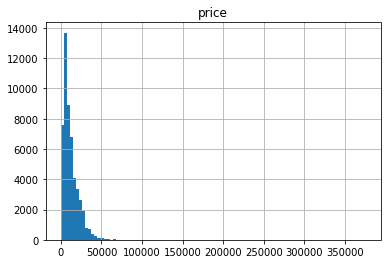

In [54]:
# Menampilkan histogram dari parameter harga
dataframe.hist('price', bins=100)
plt.show()

Histogram mengenai parameter harga sudah ditampilkan sesuai dengan yang kita inginkan. Bisakah kita menginterpretasikannya dengan baik? Kita telah membagi rentang nilai atau interval dalam sumbu X ini sebanyak 100. Saat ini dari grafik di atas sudah cukup menjelaskan bahwa **puncak dari data kolom `price` berada dalam rentang sekitar di bawah 25000 dengan jumlahnya yang mendekati 14000**. Hal ini mengartikan bahwa ada banyak kendaraan dengan harga disekitar rentang tersebut. Tidak sedikit juga kita melihat adanya harga kendaraan yang mendekati 0. Apakah kendaraan tersebut kualitasnya tidak begitu baik sehingga dijual dengan harga yang murah? Mungkin saja.

Selain itu kita juga dapat dengan mudah berasumsi adanya *outlier* yang menyebabkan grafik cukup sulit untuk dibaca. Terlihat untuk **harga kendaraan di atas 60000 jumlahnya semakin mengecil** hingga tidak terlihat lagi. Ada beberapa harga kendaraan yang sangat mahal hingga di atas 100000! Mungkin kendaraan tersebut termasuk baru dan langka. Mengenai *outlier* kita akan membaca dan menginterpretasikannya lebih jelas dengan bantuan *boxplot* setelah membahas histogram untuk kolom ini.

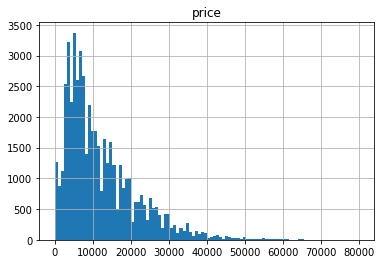

In [55]:
# Menampilkan histogram dari parameter harga dengan rentang harga yang ditentukan
dataframe.hist('price', bins=100, range=(0, 80000))
plt.show()

Kita sudah memperjelas keterbacaan grafik histogram untuk kolom harga ini dengan menetapkan rentang horizontal maksimal pada harga 80000. Dari sini kita dapat melihat lebih jelas untuk **puncak dari histogram ini ternyata berada di bawah harga 10000 atau lebih tepatnya ada di harga 5000**. Selanjutnya untuk harga kendaraan di atas 60000 dalam grafik terlihat sangat jarang dan mulai menghilang karena jumlahnya yang sangat sedikit sehingga tidak terdeteksi dalam grafik ini. Tetapi kita juga dapat mendeteksi bahwa tidak sedikit juga **harga kendaraan yang mendekati 0 dengan jumlah sekitar 1250**. Apakah hal tersebut juga dapat dikatakan sebagai *outlier* atau memang adanya kesalahan saat pengisian data untuk kolom harga? Kita tidak mengetahuinya secara pasti. Sekarang mari kita memeriksa adanya *outlier* menggunakan grafik *boxplot*.

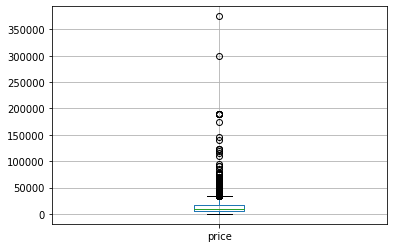

In [56]:
# Memeriksa outlier menggunakan boxplot
dataframe.boxplot('price')
plt.show()

Grafik boxplot di atas sebenarnya sudah mencerminkan adanya *outlier* dalam kolom harga, bahkan ada yang mencapai harga di atas 350000! Dari grafik ini juga sebenarnya tidak banyak membantu karena **ada banyaknya *outlier* sehingga boxplot tidak terlihat dengan jelas**. Ciri-ciri *outlier* yang dapat kita temukan dalam grafik di atas yaitu banyaknya kumpulan nilai yang melebihi bagian atas *whisker* dari boxplot (*upper whisker*). Mari kita perjelas boxplot ini dengan menentukan rentang vertikalnya.

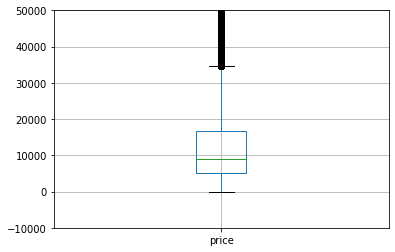

In [57]:
# Memeriksa outlier menggunakan boxplot dengan rentang vertikal yang telah ditentukan
dataframe.boxplot('price')
plt.ylim(-10000, 50000)
plt.show()

Sekarang kita dapat melihat boxplot dengan lebih jelas. Batas atas (*upper whisker*) dari boxplot terpaut pada harga 35000 dan untuk batas bawahnya (*lower whisker*) yaitu 0. Selain itu untuk median dari parameter harga berada tepat di bawah harga 10000. Dari grafik boxplot ini kita bisa memperkirakan bahwa untuk **harga kendaraan yang melebihi dari 35000 sebenarnya sudah termasuk ke dalam *outlier***. Lalu untuk Q1 atau kuartil pertama dalam boxplot di atas menunjukkan sebanyak 25% kendaraan memiliki harga sekitar 5000.

### Mempelajari Parameter Usia Kendaraan

Cara untuk mempelajari parameter ini sebenarnya sama dengan sebelumnya. Pertama kita perlu untuk membuat histogramnya terlebih dahulu.

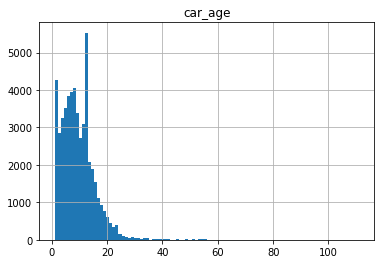

In [58]:
# Menampilkan histogram dari parameter usia kendaraan
dataframe.hist('car_age', bins=100)
plt.show()

Rentang dari nilai atau interval dalam sumbu X ini telah kita bagi menjadi 100 bagian. Dari grafik ini kita bisa melihat sesuatu hal yang menarik, yaitu untuk **usia kendaraan yang mendekati 0 tahun sepertinya dominan dan menjadi puncak tajam kedua dengan jumlahnya yang melampaui 4000** dalam grafik saat ini. Mendekati usia 20 tahun dan seterusnya, jumlahnya makin menurun dan melandai. Itu berarti kita bisa menyatakan bahwa **ada banyak jumlah kendaraan yang dijual dengan usia kendaraan yang masih sangat muda**.

Karena grafik histogram juga terlalu terhimpit di bagian kiri, kita juga dapat memprediksi adanya *outlier* dalam kolom `car_age`. Sepertinya kita juga melihat ada usia kendaraan yang lebih dari 50 tahun. Untuk bagian ini akan kita serahkan dengan bantuan grafik boxplot.

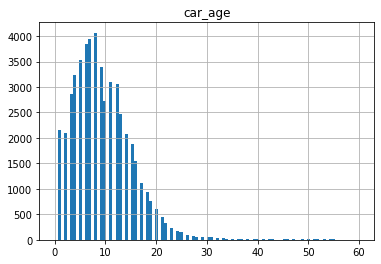

In [59]:
# Menampilkan histogram dari parameter usia kendaraan dengan rentang yang ditentukan
dataframe.hist('car_age', bins=100, range=(0, 60))
plt.show()

Ini merupakan histogram untuk rentang sumbu X yang telah ditentukan hingga maksimal usia kendaraannya yaitu 60 tahun. Sepertinya memang ada banyak kendaraan yang usianya masih satu tahun dan untuk **puncak kedua dari histogram dalam parameter ini yaitu berada pada usia 7 tahun** dan setelah itu jumlahnya mulai menurun. Sekarang mari kita periksa apakah memang terdapat *outlier* dalam parameter ini atau tidak dengan menggunakan *boxplot*.

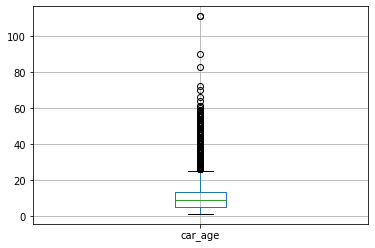

In [60]:
# Memeriksa outlier mengenai parameter usia kendaraan menggunakan boxplot
dataframe.boxplot('car_age')
plt.show()

Ternyata prediksi kita mengenai adanya *outlier* dalam parameter ini memang benar. Kita juga dapat melihat adanya nilai mengenai usia kendaraan yang lebih dari 100 tahun! Terlihat juga jumlah *outlier* dalam parameter ini tidaklah sedikit. Mari kita lihat lebih jelas untuk boxplot ini dengan mengatur rentang sumbu Y.

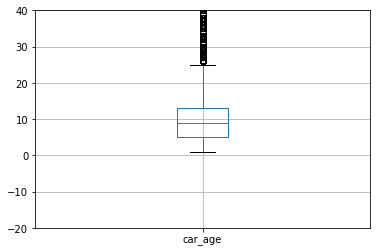

In [61]:
# Memeriksa outlier mengenai parameter usia kendaraan menggunakan boxplot menggunakan rentang tertentu
dataframe.boxplot('car_age')
plt.ylim(-20, 40)
plt.show()

Batas atas (*upper whisker*) dari boxplot ini terpaut pada usia kendaraan sekitar 25 tahun dan untuk batas bawahnya (*lower whisker*) yaitu 1 tahun. Nilai yang terpaut melebihi batas atas boxplot ini sudah termasuk dalam nilai *outlier*. **Median dari parameter ini berada pada kisaran usia kendaraan 8 tahun**. Itu berarti sebanyak 50% usia kendaraan dalam kolom `car_age` berada di atas 8 tahun dan sebanyak 50% lainnya berada di bawah 8 tahun.

### Mempelajari Parameter Jarak Tempuh

Eksplorasi data mengenai parameter saat ini sudah memasuki pada bagian pertengahan. Untuk saat ini kita akan mempelajari parameter dari kolom `odometer` dan hal pertama yang akan kita lakukan adalah dengan membuat histogram.

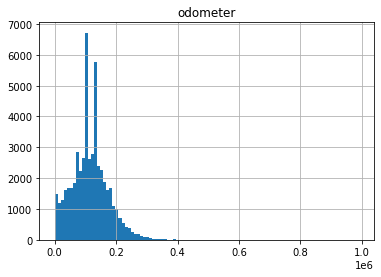

In [62]:
# Menampilkan histogram dari parameter jarak tempuh kendaraan
dataframe.hist('odometer', bins=100)
plt.show()

Grafik histogram untuk parameter jarak tempuh sudah tersedia. Berdasarkan hasil yang telah digambarkan, kita dapat menemukan fakta menarik bahwa untuk puncak dari histogram ini berada dalam jarak tempuh sekitar 0,1. Apa itu jarak tempuh 0,1? Perlu untuk dipahami bahwa dalam rentang sumbu X ini **menampilkan jarak tempuh dalam satuan jutaan** sehingga hasilnya memiliki koma dan dibawah 1. Terlihat ada dua batang yang menonjol sebagai puncak dengan jumlah masing-masih melebihi dan mendekati 6000.

Kita tidak bisa membacanya dengan jelas karena grafik cederung terhimpit dalam bagian kiri sehingga kita perlu untuk mengatur rentang horizontal grafik ini dengan jarak tertentu. Karena terlalu mengecil, kita berasumsi bahwa dalam **parameter ini terdapat nilai *outlier*** dan ini terbukti adanya jarak tempuh yang lebih dari 400000 yang jumlahnya sangat sedikit bahkan ada yang mendekati 1000000!

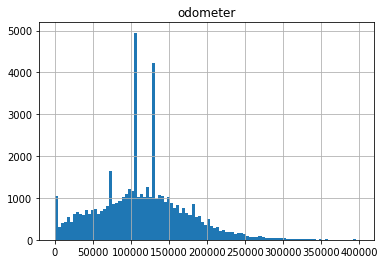

In [63]:
# Menampilkan histogram dari parameter jarak tempuh kendaraan dengan rentang yang ditentukan
dataframe.hist('odometer', bins=100, range=(0, 400000))
plt.show()

Dari histogram di atas yang sudah diatur rentang sumbunya, kita baru dapat melihat dengan jelas bahwa **kedua puncak dari jarak tempuh kendaraan berada tepat di atas 100000 dan melebihi dari 125000**. Seterusnya untuk kedua sisi dari puncak mulai mengalami penurunan jumlah atau frekuensi. Kita dapat melihat juga bahwa untuk jarak tempuh kendaraan yang di atas 300000 tergolong sangat sedikit hingga tidak terlihat lagi dalam grafik ini. Tidak sedikit juga untuk jarak tempuh kendaraan yang mendekati 0 dengan jumlahnya melebihi 1000. Itu menandakan ada banyak juga kendaraan yang mungkin belum dipakai. Untuk melihat nilai *outlier* kita kembali akan memanfaatkan grafik *boxplot*.

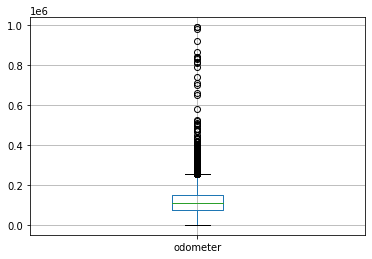

In [64]:
# Memeriksa outlier mengenai parameter jarak tempuh kendaraan
dataframe.boxplot('odometer')
plt.show()

Boxplot di atas terlihat ada banyak nilai *outlier* yang diplotkan pada bagian atas dari *whisker* bahkan ada yang jarak tempuhnya hampir mencapai 1000000 seperti yang kita duga sebelumnya. Dari boxplot ini juga kita tidak dapat melihatnya dengan jelas karena banyaknya nilai *outlier* yang berakibatkan boxplot seperti tertimpa ke bawah. Mari kita atur rentang vertikalnya dan menginterpretasikannya dengan lebih baik.

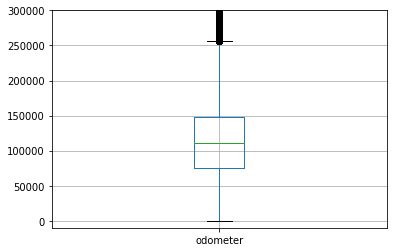

In [65]:
# Memeriksa outlier mengenai jarak tempuh kendaraan menggunakan rentang vertikal yang telah ditentukan
dataframe.boxplot('odometer')
plt.ylim(-10000, 300000)
plt.show()

Kita dapat membaca boxplot ini dengan lebih baik setelah ditentukan rentangnya. Untuk batas atas (*upper whisker*) dari boxplot ini tertanda tepat di atas 250000 atau ada pada jarak tempuh sekitar 260000. Q3 atau kuartil atas terlihat berada pada sekitar 150000. Artinya bahwa **75% nilai dari `odometer` ini merupakan kendaraan yang jarak tempuhnya sekitar 150000**. Sedangkan untuk **Q1 (kuartil bawah) menunjukkan bahwa 25% nilai dari parameter jarak tempuh ini merupakan kendaraan yang jarak tempuhnya ada pada 75000**. Untuk nilai mediannya sepertinya berada di bawah 125000.

### Mempelajari Parameter Jumlah Silinder Kendaraan

Parameter selanjutnya yang akan kita pelajari pada bagian ini merupakan parameter yang berbicara mengenai jumlah silinder pada kendaraan. Berbeda dengan eksplorasi sebelumnya, saat ini kita tidak akan membuat histogram. Lebih jelasnya kita akan **mempelajari distribusi parameter ini menggunakan diagram batang**, karena kolom `cylinders` merupakan kolom kategorik.

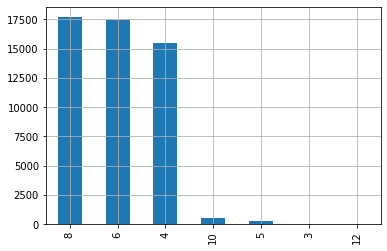

In [66]:
# Membuat diagram batang untuk parameter jumlah silinder kendaraan
dataframe['cylinders'].value_counts().plot(kind='bar', grid=True)
plt.show()

Diagram batang untuk parameter jumlah silinder kendaraan sudah dapat ditampilkan. Berdasarkan penyajian data di atas, kita dapat melihat bahwa untuk **jumlah silinder kendaraannya 8 berada dalam peringkat pertama dengan jumlah sebesar lebih dari 17500**. Untuk kendaraan yang jumlah silindernya 6 dan 4 juga termasuk dalam tiga besar yang dapat dilihat ketinggian batangnya lebih menjulang dibandingkan dengan jumlah silinder 10, 5, dan 3. Kendaraan yang jumlah silindernya ada 12 sepertinya terlihat paling sedikit dalam kolom `cylinders`. Perlu dingat bahwa nilai sudah diurutkan dari jumlah terbesar hingga terkecil.

Mengapa dalam diagram batang di atas menunjukkan untuk jumlah silinder yang 10, 5, 3, dan 12 jumlahnya sangat sedikit? Berdasarkan dari pemaparan informasi dalam situs **Kia.com**, kendaraan **pada umumnya memiliki jumlah silinder sebanyak 4, 6, atau 8**. Menurut informasi situs otomotif dari **autofun.co.id**, ternyata ada juga kendaraan yang jumlah silindernya itu 5, 10, 12, bahkan 16. Bercermin dari diagram batang di atas kita dapat menyatakan **tidak adanya anomali mengenai jumlah silinder yang aneh** dalam data ini. Tetapi penggunaan diagram batang tidak dapat memberikan informasi kepada kita mengenai adanya nilai *outlier* atau tidak.

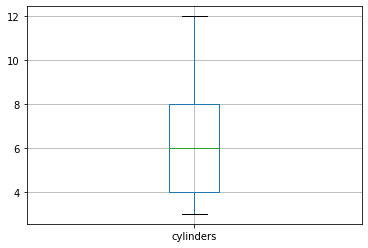

In [67]:
# Memeriksa outlier untuk parameter jumlah silinder kendaraan
dataframe.boxplot('cylinders')
plt.show()

Boxplot untuk parameter ini jikalau dilihat berbeda jauh dengan parameter-parameter sebelumnya yang telah kita identifikasi. Kita tidak melihat adanya *outlier* pada bagian atas dari *whisker* karena nilai maksimum dari kolom `cylinders` adalah 12. Selain itu untuk median dari parameter ini adalah 6 atau 50% silinder jumlahnya ada di atas 6 dan 50% lainnya ada di bawahnya. Kesimpulan dari boxplot ini adalah dalam parameter **jumlah silinder tidak terdapat nilai *outlier*** sehingga kita tidak perlu untuk melakukan penghapusan nilai *outlier* dalam tahapan selanjutnya.

### Mempelajari Parameter Kondisi Kendaraan

Untuk parameter terakhir yang akan kita identifikasi sebelum masuk dalam tahapan menangani *outlier* adalah parameter mengenai kondisi kendaraan. Sama halnya seperti dalam parameter jumlah silinder yang merupakan kolom kategorik, kita akan **membuat diagram batang** yang di ambil dari kolom kondisi kendaraan yang sudah dimuat dalam bentuk skala numerik, yaitu `condition_metric`.

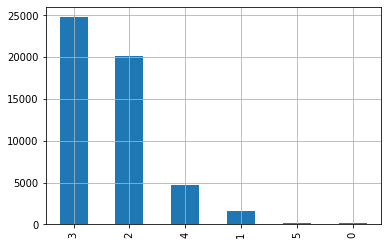

In [68]:
# Membuat diagram batang untuk parameter kondisi kendaraan
dataframe['condition_metric'].value_counts().plot(kind='bar', grid=True)
plt.show()

Parameter kondisi kendaraan ini untuk setiap nilainya mewakili satu kondisi kendaraan yang dapat dilihat kembali pada bagian perbaikan kualitas data. Batang tertinggi dari diagram di atas merupakan **kendaraan yang kondisinya *excellent* atau masih bagus dengan jumlahnya mendekati angka 25000**. Untuk kondisi kendaraan *good* dan *like new* menempati posisi kedua dan ketiga dalam grafik di atas. Kita juga menemukan bahwa untuk kondisi kendaraan yang baru (*new*) dan rongsok (*salvage*) jumlahnya paling sedikit, yaitu di bawah 1000 sehingga hampir tidak terlihat lagi. Lagi-lagi kita tidak dapat mengetahui adanya *outlier* atau tidak dalam parameter ini dan jikalau kita lihat sepertinya tidak ada masalah mengenai *outlier* saat ini. Apakah hal itu benar adanya?

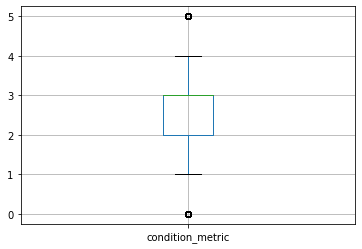

In [69]:
# Memeriksa outlier untuk parameter kondisi kendaraan
dataframe.boxplot('condition_metric')
plt.show()

Kita menemukan informasi unik dari boxplot di atas. Untuk nilai median dan kuartil atas dalam parameter ini adalah sama, yaitu ada pada angka 3 atau kondisi kendaraan yang *excellent*. Kita juga **menemukan adanya *outlier* untuk nilai 0 dan 5** atau dalam artinya, nilai tersebut merupakan kondisi kendaraan yang *salvage* dan *new*. Karena jumlahnya sangat sedikit, kedua nilai tersebut dianggap sebagai *outlier*. Tetapi karena kolom ini termasuk dalam kolom kategorik, maka **kita tidak akan melakukan penghapusan nilai *outlier* untuk parameter ini** karena memang kondisi nilai dalam kolom `condition_metric` seperti itu dan tidak disarankan untuk menghapus *outlier* dalam kolom kategorik. Jikalau kita menghapus nilainya, maka nilai dalam kolom tersebut akan berubah bahkan untuk skala kondisi nomor 0 dan 5 bisa terhapus.

## Mempelajari dan Menangani Outlier

Eksplorasi saat ini sudah memasuki dalam tahapan perbaikan data dari nilai *outlier* yang sudah kita temukan dalam bagian pengerjaan proyek mempelajari kelima parameter inti sebelumnya. Tujuan dari pekerjaan kita saat ini adalah untuk memperbaiki kualitas data dari *outlier* yang mendistorsikan data kita dan nantinya dalam tahapan pengerjaan selanjutnya kita akan membandingkannya dengan parameter yang belum dihapus nilai *outlier*-nya. Berikut ini merupakan kolom-kolom yang akan kita perbaiki dan hapus nilai *outlier*-nya:
- Harga (diambil dari kolom `price`)
- Usia kendaraan ketika iklan ditayangkan (diambil dari kolom `car_age`)
- Jarak tempuh (diambil dari kolom `odometer`)

Penghapusan nilai *outlier* akan dilakukan secara sekaligus pada setiap kolom. Nilai *outlier* akan dihapus dengan cara mengidentifikasi nilai batas atas dan bawah serta mengiris datanya berdasarkan kedua kondisi tersebut. Pekerjaan kita saat ini mungkin akan dilakukan secara berulang jikalau masih ada nilai *outlier* pada ketiga kolom. Mari kita lakukan penghapusan nilai *outlier* secara bertahap.

### Menangani *Outlier* pada Kolom `price`, `car_age`, dan `odometer` (Tahap 1)

Dalam beberapa parameter yang sudah kita selidiki, kita menemukan bahwa pada kolom `price`, `car_age`, dan `odometer` memiliki banyak nilai *outlier* yang melebihi batas atas dari bagian *boxplot*. Mengenai pernyataan tersebut kita akan menghapus nilai *outlier* pada ketiga kolom tersebut dengan cara menentukan batas atas dan bawah *outlier* secara sekaligus terlebih dahulu.

Menentukan batas atas dan bawah *outlier* sebenarnya cukup mudah, langkahnya seperti berikut ini:
- Membuat variabel yang menampung kuartil bawah (Q1) dan kuartil atas (Q3) dari data 
- Menentukan rentang interkuartil dengan cara mengurangi Q3 dengan Q1
- Membuat variabel yang menampung batas bawah *outlier*, yaitu dengan rumus `Q1 kolom - (1.5 * rentang interkuartil)`, dan
- Membuat variabel yang menampung batas atas *outlier*, yaitu dengan rumus `Q3 kolom + (1.5 * rentang interkuartil)`.

Perlu untuk diingat bahwa nilai Q1 adalah 25% dan nilai Q3 adalah 75%. Penentuan batas atas dan bawah *outlier* saat ini akan menggunakan bantuan fungsi buatan untuk mempersingkat kode kita.

In [73]:
# Menentukan batas atas dan bawah outlier menggunakan fungsi buatan
list_of_selected_column = ['price', 'car_age', 'odometer']

def upper_lower_whisker(column_name=''):
    Q1  = dataframe[column_name].quantile(0.25)
    Q3  = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)

    return lower_whisker, upper_whisker

new_df = dataframe.copy()

Kita juga telah menampung kolom dalam sebuah *list* untuk mempercepat pekerjaan kita dalam menangani nilai ekstrim saat ini. Nantinya ketika kita akan menerapkan sebuah fungsi berbeda setelah ini untuk menghapus nilai ekstrim, hal tersebut akan dilakukan secara satu per satu melalui *list* kolom yang butuh untuk ditangani nilai ekstrimnya. Dalam fungsi di atas kita juga sudah mengembalikan nilai batas atas dan bawah kepada nama fungsi dan membuat *dataset* baru untuk mengiris nilai ekstrim selanjutnya.

In [79]:
# Membuat fungsi untuk mengiris nilai ekstrim berdasarkan kondisi yang telah ditentukan
for column in list_of_selected_column:
    print('start cleaning outlier on ', column)
    lower, upper = upper_lower_whisker(column)
    new_df = new_df[(new_df[column] > lower) & (new_df[column] < upper)]
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  car_age
cleaning outlier on  car_age  was finished!
start cleaning outlier on  odometer
cleaning outlier on  odometer  was finished!


Fungsi untuk mengiris kolom yang memiliki nilai *outlier* sudah dapat dijalankan dan membuahkan hasil. Pengirisan dilakukan secara berulang untuk kolom-kolom yang ada dalam variabel `list_of_selected_column` dan ketika sudah selesai akan mengeluarkan sebuah *output* berupa pesan bahwa penghapusan *outlier* sudah selesai. Sekarang mari kita periksa satu per satu kolom yang memiliki nilai ekstrim dan mengambil langkah atas keputusan kita setelah melihat hasil yang sudah kita dapatkan.

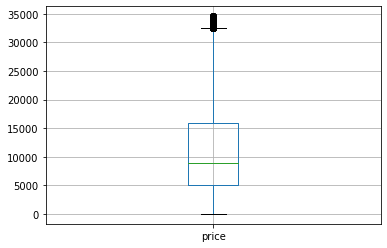

In [80]:
# Memeriksa outlier pada kolom `price` dalam DataFrame baru
new_df.boxplot('price')
plt.show()

Berdasarkan boxplot dari kolom `price` pada *dataset* baru ini kita dapat melihat dengan jelas untuk bagian *box* serta *upper whisker*-nya karena kita sudah berhasil membuang banyak nilai *outlier* pada kolom ini. Tetapi kita juga masih dapat **melihat adanya *outlier* yang berkumpul pada bagian batas atas hingga mendekati 35000**. Berdasarkan pernyataan sebelumnya, kita memutuskan untuk **kembali menghapus nilai *outlier* pada kolom ini**.

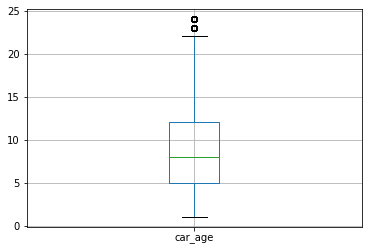

In [81]:
# Memeriksa outlier pada kolom `car_age` dalam DataFrame baru
new_df.boxplot('car_age')
plt.show()

Untuk kolom `car_age` atau usia kendaraan saat ini kita juga dapat melihat bahwa nilai ekstrim yang terlampau jauh hingga usia 100 tahun lebih sudah tidak ada lagi. Namun kita juga tidak dapat menyangkal bahwa dalam kolom ini **masih memiliki dua nilai terpaut di atas nilai batas atas** dari *box* yang ada. Sehingga kita akan **menyingkirkan lagi nilai esktrim pada kolom ini**.

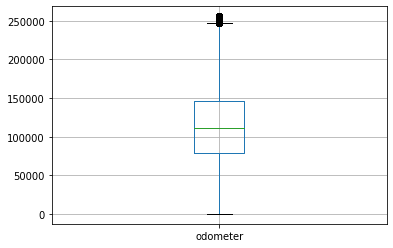

In [82]:
# Memeriksa outlier pada kolom `odometer` dalam DataFrame baru
new_df.boxplot('odometer')
plt.show()

Dengan jelas kita melihat bahwa masih terdapat nilai *outlier* dalam kolom `odometer` walaupun jumlahnya tidak signifikan, tetapi kabar baiknya kita sudah menghapus banyak nilai ekstrim yang dapat mendistorsi data dalam kolom ini. Sebelumnya kita melihat ada nilai ekstrim yang mendekati angka 1000000, dan saat ini batasnya hanya melewati sedikit dari angka 250000. Sama halnya dengan kedua kolom sebelumnya, kita memutuskan untuk **menghapus kembali nilai *outlier* untuk kolom saat ini**.

### Menangani *Outlier* pada Kolom `price`, `car_age`, dan `odometer` (Tahap 2)

Berdasarkan hasil eksperimen kita sebelumnya, kita dapat melihat bahwa untuk ketiga parameter kita saat ini masih memiliki nilai *outlier* walaupun jumlahnya tidak sebanyak yang kita temukan sebelum mengambil aksi untuk menghapus nilai *outlier*-nya. Pekerjaan kita saat ini sebenarnya hanya mengulang pada tahapan sebelumnya dengan menyalin kode fungsi untuk menentukan batas atas dan bawah, fungsi mengiris nilai ekstrim berdasarkan kondisi yang telah kita tentukan, dan mengecek kembali apakah masih ada nilai ekstrim atau tidak.

Pertama kali kita akan terlebih dahulu menemukan batas atas dan bawah *outlier* dengan cara menentukan kuartil atas dan kuartil bawah, mencari rentang interkuartilnya, dan menentukan batas atas dan bawahnya menggunakan rumus yang sama dalam sebuah fungsi. Mari kita kerjakan bagian ini sekarang juga!

In [83]:
# Menentukan batas atas dan bawah outlier menggunakan fungsi buatan
list_of_selected_column = ['price', 'car_age', 'odometer']

def upper_lower_whisker(column_name=''):
    Q1  = new_df[column_name].quantile(0.25)
    Q3  = new_df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)

    return lower_whisker, upper_whisker

new_df_2 = new_df.copy()

Kode untuk menentukan nilai batas atas dan bawah menggunakan fungsi sudah kita salin kembali. Kita juga tidak lupa untuk memakai *dataset* baru dari hasil penghapusan nilai ekstrim sebelumnya. Selanjutnya kita akan menyalin lagi kode yang memuat fungsi buatan untuk mengiris data berdasarkan kondisi yang sudah kita tetapkan.

In [84]:
# Membuat fungsi untuk mengiris nilai ekstrim berdasarkan kondisi yang telah ditentukan untuk kedua kalinya
for column in list_of_selected_column:
    print('start cleaning outlier on ', column)
    lower, upper = upper_lower_whisker(column)
    new_df_2 = new_df_2[(new_df_2[column] > lower) & (new_df_2[column] < upper)]
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  car_age
cleaning outlier on  car_age  was finished!
start cleaning outlier on  odometer
cleaning outlier on  odometer  was finished!


Fungsi pengirisan data sudah kita salin pada bagian saat ini. Kita perlu mengingat bahwa pengirisan data  dilakukan dengan cara mengeliminasi nilai-nilai yang melebihi batas atas dan bawah, sisa nilai-nilai yang termasuk dalam dua kondisi tersebut akan disimpan dalam variabel baru. Selanjutnya kita akan memeriksa kembali setiap kolom yang sudah dihapus nilai ekstrimnya, apakah masih terdapat *outlier* atau tidak.

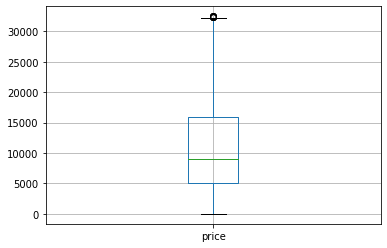

In [85]:
# Memeriksa outlier pada kolom `price` dalam DataFrame baru
new_df_2.boxplot('price')
plt.show()

Melalui grafik di atas, kita dapat melihat bahwa nilai *outlier* sudah tidak sebanyak pada tahap penghapusan nilai ekstrim sebelumnya, di mana nilai *outlier*-nya mencapai sekitar harga kendaraan 35000. Dengan jelas kita lihat **jumlah *outlier* hanya tersisa sedikit saja** pada bagian batas (*upper whisker*) atas boxplot. Sekarang ini walaupun masih terdapat *outlier*, kualitas data yang kita miliki dalam kolom ini menjadi semakin baik. Dengan demikian kita perlu untuk **melakukan penghapusan *outlier* untuk kolom ini sekali lagi**.

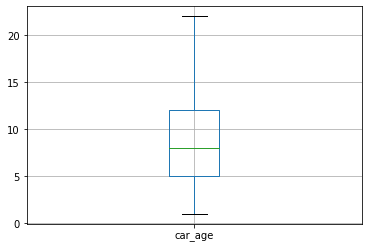

In [86]:
# Memeriksa outlier pada kolom `car_age` dalam DataFrame baru
new_df_2.boxplot('car_age')
plt.show()

Boxplot dari parameter usia kendaraan sudah dapat dilihat. Kabar baiknya kita sudah menghapus seluruh nilai ekstrim atau *outlier* dalam kolom `car_age`! Terlihat pada **bagian batas atas (*upper whisker*) tidak terdapat lagi satupun nilai ekstrim** dan boxplot ini dapat dibaca dengan sangat jelas. Berarti kita hanya melakukan dua kali penghapusan nilai *outlier* dalam kolom ini dan hasilnya langsung terlihat. Untuk lebih jelasnya mengenai penjelasan bagian ini akan kita bahas dalam tahapan pengerjaan proyek selanjutnya.

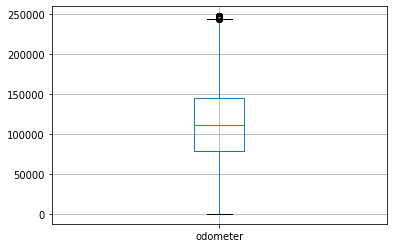

In [87]:
# Memeriksa outlier pada kolom `odometer` dalam DataFrame baru
new_df_2.boxplot('odometer')
plt.show()

Bisakah kita membandingkannya dengan tahap penghapusan nilai ekstrim sebelumnya? Ya, tentu saja. Untuk nilai ekstrim sebelumnya masih ada yang nilainya terpaut di atas jarak tempuh kendaraannya 250000. Sekarang ini walaupun masih ada nilai *outlier*, kita dapat membandingkannya bahwa **jumlah nilai ekstrimnya menjadi lebih sedikit**. Berdasarkan pernyataan sebelumnya dan sama dengan kolom `price`, sepertinya kita hanya **butuh satu kali lagi untuk menghapus nilai *outlier* bagi kolom ini**.

### Menangani *Outlier* pada Kolom `price` dan `odometer` (Tahap 3)

Bagian terakhir dalam penanganan nilai ekstrim saat ini akan dilakukan secara khusus untuk kolom `price` dan `odometer`. Menurut hasil penghapusan nilai ekstrim tahap kedua, kita melihat bahwa untuk parameter harga dan jarak tempuh kendaraan masih memiliki *outlier* walaupun jumlahnya sangat sedikit. Pekerjaan kita saat ini sebenarnya hanya kembali mengulang pada tahapan-tahapan sebelumnya dengan menyalin kode fungsi untuk menentukan batas atas dan bawah, fungsi mengiris nilai ekstrim berdasarkan kondisi yang telah kita tentukan, dan mengecek kembali apakah masih ada nilai ekstrim atau tidak.

Kita akan terlebih dahulu menemukan batas atas dan bawah outlier dengan cara menentukan kuartil atas dan kuartil bawah, mencari rentang interkuartilnya, dan menentukan batas atas dan bawahnya menggunakan rumus yang sama dalam sebuah fungsi.

In [88]:
# Menentukan batas atas dan bawah outlier menggunakan fungsi buatan
list_of_selected_column = ['price', 'car_age', 'odometer']

def upper_lower_whisker(column_name=''):
    Q1  = new_df_2[column_name].quantile(0.25)
    Q3  = new_df_2[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)

    return lower_whisker, upper_whisker

new_df_3 = new_df_2.copy()

Kode untuk menentukan nilai batas atas dan bawah menggunakan fungsi sudah kita salin kembali. Kita juga tidak lupa untuk memakai *dataset* baru dari hasil penghapusan nilai ekstrim sebelumnya. Sehabis ini kita akan menyalin lagi kode yang memuat fungsi buatan untuk mengiris data berdasarkan suatu kondisi.

In [91]:
# Membuat fungsi untuk mengiris nilai ekstrim berdasarkan kondisi yang telah ditentukan untuk ketiga kalinya
for column in list_of_selected_column:
    print('start cleaning outlier on ', column)
    lower, upper = upper_lower_whisker(column)
    new_df_3 = new_df_3[(new_df_3[column] > lower) & (new_df_3[column] < upper)].reset_index(drop=True)
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  car_age
cleaning outlier on  car_age  was finished!
start cleaning outlier on  odometer
cleaning outlier on  odometer  was finished!


Seperti yang telah kita jelaskan pada tahap kedua, pengirisan data dilakukan dengan cara mengeliminasi nilai-nilai yang melebihi batas atas dan bawah, sisa nilai-nilai yang termasuk dalam dua kondisi tersebut akan disimpan dalam variabel baru. Bagian akhir dari penghapusan nilai *outlier* saat ini kita akan memeriksa kembali setiap kolom yang sudah dihapus nilai ekstrimnya, apakah masih terdapat *outlier* atau tidak.

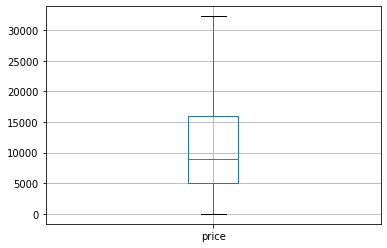

In [92]:
# Memeriksa outlier pada kolom `price` dalam DataFrame baru
new_df_3.boxplot('price')
plt.show()

Sepertinya kita melihat adanya perubahan besar! Dapat dilihat dari boxplot yang sudah disajikan untuk kolom harga kendaraan saat ini, **nilai ekstrim atau *outlier* tidak terdeteksi sama sekali**. Itu artinya kualitas data kita menjadi semakin membaik dan khususnya boxplot dapat dibaca dengan sangat jelas. Perjalanan kita untuk menghapus nilai *outlier* dalam kolom `price` sudah berhenti sampai di sini.

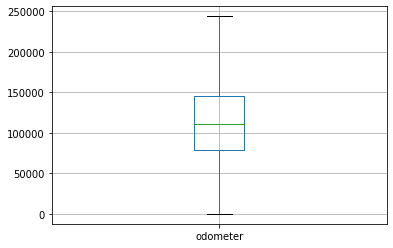

In [94]:
# Memeriksa outlier pada kolom `odometer` dalam DataFrame baru
new_df_3.boxplot('odometer')
plt.show()

Kita mendapatkan kabar baik lagi saat ini! Nilai *outlier* dalam kolom `odometer` nampaknya sudah tidak ada lagi sekarang ini. Kualitas data yang kita harapkan untuk parameter jarak tempuh kendaraan ini sudah kita dapatkan. Dengan demikian, perjalanan kita dalam menghapus nilai ekstrim untuk ketiga parameter yang bermasalah sudah berakhir saat ini. Kerja yang baik!

## Mempelajari Parameter Inti Tanpa Outlier

Kembali lagi kita masuk dalam bagian eksplorasi data untuk mempelajari beberapa parameter. Pada pengerjaan proyek bagian ini akan berhubungan dengan kedua sub-bab sebelumnya yang telah kita kerjakan, yaitu mempelajari parameter yang mengandung nilai ekstrim dan penanganan nilai *outlier*. Pembahasan saat ini cenderung kepada kegiatan membandingkan parameter yang memiliki nilai *outlier* dengan parameter yang sudah bersih seluruhnya dari nilai *outlier*. Untuk parameter-parameter yang akan kita bandingkan saat ini ada tiga, yaitu:
- Harga (`price`)
- Usia kendaraan ketika iklan ditayangkan (`car_age`)
- Jarak tempuh kendaraan (`odometer`)

Perbandingan akan dilakukan dengan menjelaskan perbedaan sebelum dan sesudah kolom dihapus nilai *outlier*-nya dengan menggunakan grafik *boxplot* serta *histogram* yang telah dibuat dalam tahapan-tahapan sebelumnya.

### Membandingkan Paramater Harga dari Kedua *Dataset* yang Berbeda

Parameter pertama yang kita selidiki dan bandingkan adalah berasal dari kolom `price`. Langkah pertama yang akan kita lakukan yaitu dengan membuat histogram dan boxplot dari *dataset* yang belum dihapus nilai *outlier*-nya. Setelah itu kita akan membuat kembali histogram dan boxplot tetapi dari *dataset* yang sudah disingkirkan nilai ekstrimnya. Setiap perbedaan sebelum dan sesudah akan dijelaskan secara rinci menggunakan poin.

**Parameter harga kendaraan sebelum dihapus *outlier*-nya**

Dalam pengerjaan bagian ini kita akan terlebih dahulu menampilkan grafik histogram dan boxplot dari *dataset* awal yang belum ditangani *outlier*-nya serta menjelaskan isi grafiknya. Caranya mudah kita hanya perlu mengambil kembali kode yang memuat pembuatan histogram dan boxplot dalam bagian pengerjaan proyek 1.6, yaitu mempelajari parameter inti.

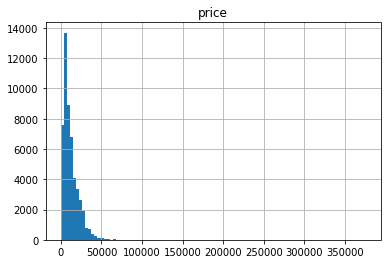

In [95]:
# Menampilkan histogram kolom `price` sebelum dihapus nilai ekstrimnya
dataframe.hist('price', bins=100)
plt.show()

Kita sudah membuat kembali histogramnya dan ini adalah penjelasan ulang yang sebelumnya kita paparkan dalam bentuk poin:
- Histogram terlihat terlalu himpit di bagian kiri grafik karena terdapat banyak nilai ekstrim untuk harga kendaraan di atas 50000
- Salah satu contoh nilai ekstrim dalam data pada kolom ini adalah adanya harga kendaraan yang lebih dari 350000
- Puncak histogram ini ternyata berada di bawah harga 10000 atau lebih tepatnya ada di harga 5000, ini baru dapat dilihat jikalau kita mengatur rentang sumbu X
- Ada cukup banyak harga kendaraan yang mendekati 0.

Kesimpulan dari grafik ini adalah terdapat puncak yang sangat tinggi yang kita tidak dapat ketahui dengan jelas karena grafiknya sulit untuk dibaca dan nilai dari sumbu X-nya terlihat mencapai lebih dari 350000 sedangkan banyak batang histogramnya yang berkumpul di bawah harga kendaraan 60000.

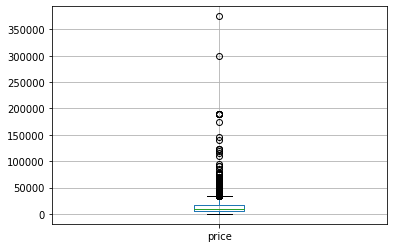

In [96]:
# Memeriksa outlier kolom `price` sebelum dihapus nilai ekstrimnya
dataframe.boxplot('price')
plt.show()

Boxplot di atas menggambarkan data yang banyak mengandung nilai ekstrim dalam kolom `price`. Berikut adalah penjelasan dari grafik di atas:
- Grafik tidak dapat dibaca dengan jelas karena nilai *outlier*-nya banyak
- Batas atas (*upper whisker*) dari boxplot terpaut pada harga 35000 dan untuk batas bawahnya (*lower whisker*) yaitu 0
- Median dari parameter harga berada tepat di bawah harga 10000

Kesimpulan dari boxplot ini adalah kita dapat melihat banyak nilai ekstrim yang menyebabkan *box*-nya terlalu terhimpit di bagian bawah grafik sehingga jikalau kita ingin melihat median dan nilai batas atas dan bawahnya, kita perlu mengatur rentang sumbu Y-nya secara spesifik.

**Parameter harga kendaraan setelah dihapus *outlier*-nya**

Bagian pengerjaan saat ini yaitu kita akan menampilkan histogram dan boxplot dari parameter harga kendaraan yang sudah dihapus nilai *outlier*-nya dalam *dataset* baru serta memberikan penjelasan atas hasil perbandingan dengan parameter kendaraan yang belum dihapus nilai *outlier*-nya. Bagian ini kita juga hanya perlu untuk menyalin kembali hasil pekerjaan kita dalam tahapan proyek sebelumnya, tepatnya pada bagian menangani *outlier*.

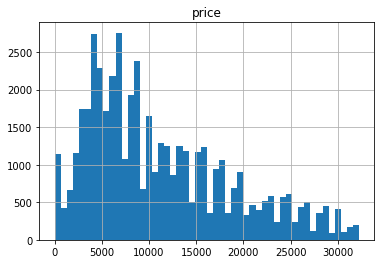

In [97]:
# Menampilkan histogram kolom `price` setelah dihapus nilai ekstrimnya
new_df_3.hist('price', bins=50)
plt.show()

Histogram untuk kolom `price` terlihat berbeda jauh dengan histogram yang ada nilai ekstrimnya. Berikut ini merupakan penjelasan dari grafik di atas:
- Karena nilai ekstrim sudah disingkirkan, kita dapat dengan **lebih mudah membaca dan menginterpretasikan** histogram untuk parameter harga kendaraan ini. Perbedaan jelasnya yaitu dalam histogram sebelum ini kita dapat melihat batang-batangnya menyempit pada bagian kiri grafik, sedangkan untuk histogram ini **sebaran batangnya lebih menyeluruh**
- Nilai **batas sumbu X saat ini hanya mencapai kurang dari 35000**, berbeda dengan histogram sebelumnya yang mencapai lebih dari 350000. Itu dikarenakan kita sudah menentukan nilai batas atas saat menyingkirkan nilai *outlier*
- Tanpa perlu memperjelas histogram dengan menentukan rentang sumbu X, kita sudah dapat membaca kedua puncak dari histogram berada di antara harga kendaraan 5000
- Setelah menghapus seluruh nilai ekstrim, saat ini kita memiliki kualitas data dalam kolom `price` yang jauh lebih baik.

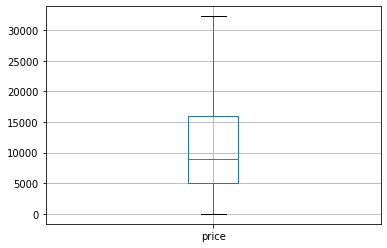

In [98]:
# Memeriksa outlier pada kolom `price` setelah dihapus nilai ekstrimnya
new_df_3.boxplot('price')
plt.show()

Penghapusan nilai ekstrim dalam parameter harga kendaraan memiliki manfaat yang menonjol. Berikut penjelasan dari boxplot yang sudah dihapus nilai *outlier*-nya:
- Keuntungannya yaitu kita **dapat membaca dengan jelas grafik ini karena tidak terdapat sama sekali nilai ekstrim** sehingga tampilan *box* menjadi lebih mudah dilihat
- Batas atas (*upper whisker*) telah berubah menjadi sekitar 32500
- Untuk nilai mediannya hampir sama yaitu di bawah dari 10000 dan hanya berubah sedikit saja.

### Membandingkan Paramater Usia Kendaraan dari Kedua *Dataset* yang Berbeda

Parameter kedua yang akan kita pelajari dan bandingkan adalah usia kendaraan yang berasal dari kolom `car_age`. Seperti bagian parameter sebelumnya, kita akan terlebih dahulu menampilkan histogram dan boxplot dari *dataset* yang memiliki nilai ekstrim dan setelah itu barulah kita akan menampilkan histogram dan boxplot tanpa nilai ekstrim beserta penjelasannya.

**Parameter usia kendaraan sebelum dihapus *outlier*-nya**

Hal yang dibutuhkan untuk bagian ini adalah dengan merujuk pekerjaan kita pada poin 1.6 yaitu mempelajari parameter inti dan setelah itu kita dapat mengambil kembali *dataset* lama kita yang berisikan nilai *outlier*. Berikut ini histogram dan boxplot dari kolom `car_age` yang memiliki nilai ekstrim.

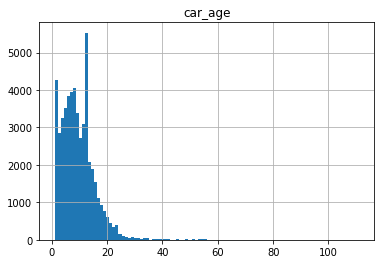

In [99]:
# Menampilkan histogram kolom `car_age` sebelum dihapus nilai ekstrimnya
dataframe.hist('car_age', bins=100)
plt.show()

Histogram kolom `car_age` yang sebelum ditangani nilai *outlier*-nya sudah berhasil ditampilkan kembali. Kita mendapatkan beberapa kesimpulan berupa:
- Histogram terlihat terlalu menyempit pada bagian kiri karena adanya nilai dari usia kendaraan lebih dari 100 tahun
- Usia kendaraan yang mendekati 0 dan di bawah 20 tahun sepertinya lebih dominan dan menjadi puncak tajam dengan jumlahnya yang melampaui 4000 dan 5000
- Setelah mencapai lebih dari 50 tahun, batangnya mulai tidak terlihat lagi karena jumlahnya yang sangat sedikit.

Kesimpulan keseluruhan dari pernyataan sebelumnya adalah grafik boxplot tidak terlihat dengan jelas karena terdistorsi oleh banyaknya usia kendaraan yang tergolong menjadi nilai ekstrim dan banyak batang histogram yang berkumpul di bawah angka 40 tahun.

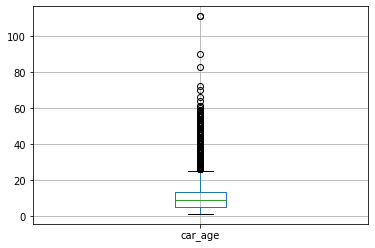

In [100]:
# Menampilkan outlier kolom `car_age` sebelum dihapus nilai ekstrimnya
dataframe.boxplot('car_age')
plt.show()

Boxplot dari kolom `car_age` yang mengandung *outlier* di atas sudah berhasil ditampilkan kembali. Dari grafik itu menjelaskan beberapa arti, yaitu:
- Terdapat nilai ekstrim untuk usia kendaraan yang mencapai lebih dari 100 tahun
- Jumlah nilai *outlier*-nya terlihat sangat banyak sehingga terlihat seperti menghimpit *box*-nya
- Median dari parameter ini berada pada kisaran usia kendaraan 8 tahun

Kesimpulan keseluruhan dari boxplot di atas seperti pada permasalahan pada grafik sebelumnya, yaitu banyak nilai ekstrim yang membuat boxplot ini sulit untuk dicari nilai median dan batas atasnya.

**Parameter usia kendaraan setelah dihapus *outlier*-nya**

Untuk mengerjakan bagian ini, kita akan mengambil *dataset* hasil dari pengirisan data dari nilai ekstrim dan membuat histogram dan boxplot-nya beserta dengan penjelasan mengenai informasi kedua grafiknya terhadap grafik usia kendaraan yang mengandung nilai ekstrim.

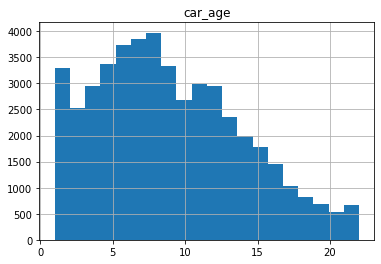

In [101]:
# Menampilkan histogram kolom `car_age` setelah dihapus nilai ekstrimnya
new_df_3.hist('car_age', bins=20)
plt.show()

Dari grafik histogram yang telah dihapus nilai *outlier*-nya, kita dapat melihat beberapa perbedaan yang mencolok. Berikut ini merupakan informasi dari histogram di atas dan perbedaanya dengan histogram sebelumnya:
- Grafik histogram saat ini terlihat **lebih mudah dan sederhana ketika dibaca** dibandingkan dengan histogram sebelumnya serta seluruh batang tersebar secara merata
- Banyak kendaraan yang berusia 8 tahun dengan frekuensi sebanyak hampir 4000 kendaraan
- Dalam grafik sebelumnya kita melihat bahwa *grid* sumbu X mencapai hingga 100 tahun. Setelah dihapus nilai ekstrimnya, batas *grid* telah berubah menjadi kurang dari 25 tahun. Itu berarti kita telah menghapus banyak nilai ekstrim, dan
- Kualitas data dalam kolom `car_age` ini menjadi **jauh lebih baik**.

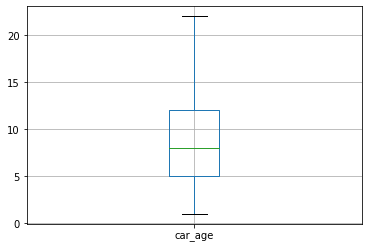

In [102]:
# Menampilkan outlier kolom `car_age` setelah dihapus nilai ekstrimnya
new_df_3.boxplot('car_age')
plt.show()

Ketika kita menyingkirkan nilai ekstrim, bentuk dari grafik boxplot dapat berubah secara drastis. Contohnya seperti untuk boxplot dari parameter usia kendaraan ini. Berikut beberapa fakta menarik yang kita temukan dari boxplot di atas:
- Kabar baik yang kita dapatkan adalah dalam **boxplot di atas tidak terdapat sama sekali nilai ekstrim**. Dibandingkan dengan boxplot sebelumnya yang terdapat nilai terpaut melebihi batas atas, kita **dapat dengan mudah melihat bagian *box* serta batas atas dan bawah dari boxplot** ini
- Kita dapat menentukan nilai kuartil atas dan kuartil bawahnya dengan mudah, dan
- Nilai mediannya terlihat di sekitar angka 8 dan hanya berubah sedikit saja.

### Membandingkan Parameter Jarak Tempuh Kendaraan dari Kedua *Dataset* yang Berbeda

Parameter terakhir yang akan kita pelajari dan bandingkan yaitu parameter yang berbicara mengenai jarak tempuh kendaraan. Serupa dengan kedua bagian pengerjaan sebelumnya, kita akan terlebih dahulu menampilkan dan menjelaskan grafik histogram dan boxplot pada kolom `odometer` menggunakan *dataset* yang mengandung nilai *outlier* pada kolom tersebut.

**Parameter jarak tempuh kendaraan sebelum dihapus *outlier*-nya**

Pengerjaan pertama dalam bagian ini adalah dengan cara menampilkan histogram dan boxplot dari *dataset* yang memiliki nilai ekstrim dalam kolom `odometer`. Berikut ini merupakan grafik beserta penjelasannya.

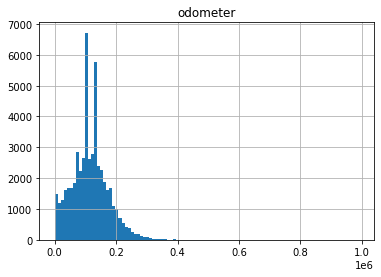

In [103]:
# Menampilkan histogram kolom `odometer` sebelum dihapus nilai ekstrimnya
dataframe.hist('odometer', bins=100)
plt.show()

Histogram dari kolom `odometer` sudah kita tampilkan kembali dalam bagian ini. Berikut ini adalah penjelasan mengenai permasalahan yang terdapat pada grafik histogram di atas:
- Histogram terlihat sedikit menyempit pada bagian kiri grafik sehingga cukup sulit untuk dibaca dengan jelas
- Terdapat banyak nilai ekstrim, bahkan ada yang jarak tempuh kendaraannya mencapai 1000000
- Setelah jarak tempuh kendaraan lebih dari 400000, kita tidak dapat melihat batangnya karena jumlahnya yang sangat sedikit dan tersebar hingga angka 1000000. Inilah yang menyebabkan batang-batangnya bergeser hingga menghimpit bagian kiri grafik.

Kesimpulan keseluruhan dari penjelasan di atas yaitu untuk keterbacaan grafik tidaklah baik. Contohnya jikalau kita ingin mencari nilai puncaknya pada sumbu X, kita harus terlebih dahulu menetapkan suatu rentang sekitar untuk puncak grafiknya.

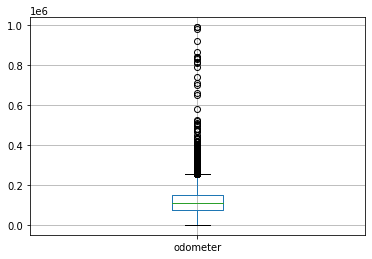

In [104]:
# Menampilkan outlier kolom `odometer` sebelum dihapus nilai ekstrimnya
dataframe.boxplot('odometer')
plt.show()

Boxplot mengenai informasi nilai ekstrim dalam parameter jarak tempuh kendaraan telah disediakan lagi untuk saat ini. Inilah beberapa poin penjelasan mengenai permasalahan dari grafik di atas:
- Terdapat beberapa nilai ekstrim jarak tempuh kendaraan yang sangat besar hingga hampir mencapai 1000000 dan ini menyebabkan nilai pada sumbu Y ditampilkan dalam bentuk jutaan
- Terlalu banyak nilai *outlier* yang terpaut pada bagian atas setelah batas atas sehingga boxplot di atas tidak dapat dijelaskan dengan mudah
- Hasil dari banyaknya nilai ekstrim mendistorsi nilai dalam data pada kolom `odometer` ini.

Kesimpulan dari keseluruhan pernyataan di atas adalah untuk boxplot dalam kolom `odometer` saat ini terdapat banyak nilai ekstrim yang membuat boxplot terhimpit di bagian bawah grafik sehingga kita perlu untuk menghapus nilai ekstrimnya.

**Parameter jarak tempuh kendaraan setelah dihapus *outlier*-nya**

Bagian akhir dalam mempelajari dan membandingkan parameter jarak tempuh kendaraan saat ini yaitu dengan cara menampilkan hasil dari penghapusan nilai *outlier* menggunakan histogram dan boxplot. Untuk *dataset*-nya kita gunakan yang baru hasil dari pengirisan data untuk menghilangkan nilai ekstrim dalam parameter ini. Berikut ini merupakan grafik serta penjelasan dari hasil penghapusan nilai *outlier* dalam kolom `odometer`.

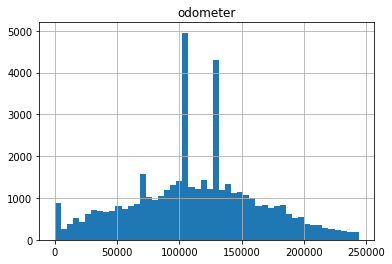

In [105]:
# Menampilkan histogram kolom `odometer` setelah dihapus nilai ekstrimnya
new_df_3.hist('odometer', bins=50)
plt.show()

Penghapusan nilai ekstrim berdampak pada hasil histogram dalam kasus ini dan kita bisa melihat perbedaannya. Berikut ini adalah penjelasan mengenai informasi yang dapat kita tarik dari histogram baru di atas:
- Histogram sebelumnya terlihat menyempit di bagian kiri dan cukup sulit dibaca, tetapi saat ini **ketika nilai *outlier*-nya sudah disingkirkan kita dapat membacanya dengan baik**
- Nilai dari sumbu X atau jarak tempuh kendaraan yang sebelumnya mencapai 1000000, **sekarang ini batasnya hanya menjadi sekitar 250000**. Itu karena kita telah menentukan batas atas *outlier* dan menghapus nilai yang melebihi batas tersebut, dan
- Tanpa perlu menentukan rentang untuk memperjelas histogram, kita dapat menentukan kedua puncak menonjol dalam histogram baru di atas.

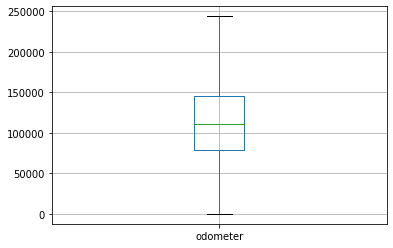

In [106]:
# Menampilkan outlier kolom `odometer` setelah dihapus nilai ekstrimnya
new_df_3.boxplot('odometer')
plt.show()

Nilai ekstrim yang telah dihapus juga berdampak kepada hasil dari boxplot yang berbeda dengan sebelumnya. Walaupun dalam boxplot di atas masih terdapat sedikit *outlier*, berikut ini adalah penjelasan mengenai temuan kita saat ini:
- Boxplot baru di atas **lebih baik tampilan dan keterbacaannya**, kerena kita dapat dengan mudah menentukan beberapa komponen boxplot seperti kuartil atas, kuartil bawah, median, dan batas atasnya
- Nilai dari sumbu Y sebelumnya mencapai 1000000, tetapi sekarang sama seperti histogram di atas yaitu hanya mencapai 250000
- Berbeda dengan boxplot sebelum dihapus nilai ekstrimnya, kita melihat dengan pasti bahwa **tidak ada lagi nilai ektrim untuk kolom ini**
- Walaupun banyak nilai yang terhapus, kita dapat melihat untuk **nilai mediannya masih tetap di atas 100000** dan hanya berubah sedikit.

Pada akhirnya kita dapat menyelesaikan pengerjaan proyek untuk tahapan membandingkan parameter yang berisi nilai ekstrim dengan yang sudah dihapus nilai ekstrimnya. Kita pula dapat menyimpulkan bahwa penghapusan nilai *outlier* dapat meningkatkan keterbacaan grafik menjadi lebih baik dan kualitas datanya menjadi lebih baik.

## Masa Berlaku Iklan 

Pekerjaan kita saat ini sudah mencapai dalam eksplorasi data mengenai masa berlaku iklan yang dapat dilihat dalam kolom `days_listed`. Dalam bagian eksplorasi saat ini kita akan mencari nilai rata-rata (*mean*) serta mediannya. Tidak hanya itu kita juga memerlukan data mengenai iklan dengan penayangan tercepat dan iklan dengan penayangan yang sangat lama.

In [107]:
# Tampilan data dari dataset baru
new_df_3.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_posted,car_age,average_odometer,condition_metric
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018,6,5,8,18125.000000,2
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,4,8,11088.125000,2
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,3,7,15714.285714,4
3,1500.0,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,2019,3,4,17,10683.117647,1
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,1,3,26967.666667,3


Untuk pengerjaan bagian ini dan seterusnya kita tidak lupa untuk memberitahukan bahwa *dataset* yang akan kita gunakan merupakan *dataset* baru dari hasil akhir pengirisan data untuk menghilangkan nilai ekstrim. Kita dapat memulai eksplorasi untuk menjawab 4 pertanyaan sebelumnya dengan mudah menggunakan metode `.describe()` terhadap kolom `days_listed`.

In [108]:
# Menampilkan statistik deskriptif dari kolom `days_listed`
new_df_3['days_listed'].describe().reset_index()

,index,days_listed
0,count,47004.000000
1,mean,39.550421
2,std,28.206426
3,min,0.000000
4,25%,19.000000
5,50%,33.000000
6,75%,53.000000
7,max,271.000000


Kita sudah dapat menjawab seluruh pertanyaan dalam bagian eksplorasi saat ini hanya dengan melihat tabel di atas. Dengan mengunakan nilai rata-rata (*mean*), kita dapat menjelaskan bahwa **nilai rata-rata dari masa iklan ditayangkan adalah sekitar 39.5 hari atau 40 hari** lamanya. Sedangkan untuk **nilai mediannya berada tepat pada waktu selama 33 hari**. Kita dapat melihat adanya perbedaan yang cukup besar antara nilai *mean* dengan *median*. Jikalau kita menggunakan median untuk menjelaskannya, maka secara umum suatu kendaraan diiklankan selama 33 hari lamanya.

**Pertanyaan: Lalu kapan suatu iklan dianggap terlalu cepat dan terlalu lama masa penayangannya?**
- Berdasarkan tabel yang telah disajikan, kita dapat menentukan untuk **iklan yang ditayangkan dengan cepat hanya bertahan selama 0 hari**. Apa maksud dari angka tersebut? Kita memiliki dua tafsiran untuk menjawab bagian ini. Pertama untuk iklan yang hanya ditayangkan kurang dari 1 hari atau dalam hitungan jam saja **bisa dikarenakan ada kendaraan yang terjual dengan sangat cepat**. Tafsiran lainnya yang kita duga yaitu bisa saja oleh karena suatu hal **iklan tersebut dihapus dalam hari yang sama ketika iklan ditayangkan**
- Bagi iklan yang ditayangkan dengan **waktu paling lama dapat kita temukan selama 271 hari**. Hampir satu tahun bukan? Melalui bagian ini kita memiliki praduga bahwa iklan yang masa tayangnya paling lama dikarenakan **kendaraan belum juga terjual hingga berbulan-bulan** sehingga iklannya masih tetap ada. Ini sungguh waktu yang terbilang lama jika kita bandingkan dengan rata-rata masa penayangan kendaraan.

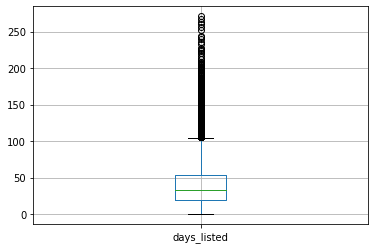

In [109]:
# Menampilkan boxplot dari kolom `days_listed`
new_df_3.boxplot('days_listed')
plt.show()

Pilihan lain dalam eksplorasi saat ini yang dapat kita gunakan adalah dengan menggunakan grafik boxplot. Kita dapat menjawab untuk nilai median, nilai minimum, dan nilai maksimum dari grafik di atas. Kalau kita melihat boxplot dari kolom `days_listed` ini terdapat banyak nilai ekstrim.

## Harga Rata-Rata Setiap Jenis Kendaraan

Eksplorasi data selanjutnya yang akan kita pelajari yaitu mengenai jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Tahap pertama yang akan kita lakukan adalah dengan membuat tabel ringkasan mengenai jumlah kendaraan yang diiklankan dengan harga rata-rata berdasarkan jenis kendaraannya. Untuk tahap kedua kita baru bisa membuat sebuah grafik yang menunjukkan ketergantungan jumlah iklan terhadap jenis kendaraan dari tabel ringkasan yang sudah dibuat. Tanpa berlama-lama, mari kita membuat terlebih dahulu tabel ringkasan dalam pengerjaan proyek bagian ini menggunakan *pivot table*.

In [110]:
# Membuat tabel ringkasan mengenai jumlah kendaraan dengan harga rata-rata berdasarkan jenis kendaraannya
pivot_type = new_df_3.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])

*Pivot table* mengenai ringkasan jumlah iklan dan harga rata-rata setiap jenis kendaraan sudah kita buat dan berhasil disimpan dalam variabel baru bernama `pivot_type`. Bagaimana ya kira-kira gambaran dari *pivot table* kita sekarang ini? Apakah hasilnya sesuai dengan yang kita harapkan? Mari kita lihat jawabannya dengan meneruskan pekerjaan kita saat ini.

In [111]:
# Menampilkan pivot table mengenai ringkasan yang telah kita buat sebelumnya
pivot_type

,mean,count
,price,price
type,,
SUV,10381.558502,11615
bus,19959.166667,18
convertible,12947.844037,327
coupe,13657.162589,1962
hatchback,6851.742515,1002
mini-van,8087.836717,1133
offroad,14648.933735,166
other,10631.839130,230


Ternyata untuk kolom dan indeks dari tabel kita sudah benar! Untuk harga rata-rata dan jumlah iklan setiap kendaraan diringkas berdasarkan tipe kendaraannya sebagai indeks dalam tabel di atas. Tetapi bisakah kita membacanya dengan jelas? Bagaimana dengan judul kolomnya juga, terlihat sedikit memusingkan bukan?
- Dilihat dari judul tabel hasil *pivot table* di atas, terlihat **memiliki judul bertingkat pada kedua kolomnya**. Sehingga kita cukup bingung untuk mengartikan isi dari setiap kolomnya. Ini dinamakan sebagai *multi-index* yakni struktur pengindeksan hierarkis yang kita jumpai ketika indeks berisi daftar nilai, bukan satu nilai saja. Ini disebabkan karena kita menempatkan dua nilai aggregat (*mean* dan *count*) dalam ringkasan tabel di atas sehingga nama dari aggregatnya juga ikut disertakan sebagai judul kolom. Langkah yang akan kita lakukan adalah dengan **menamai ulang judul kolom bertingkat dalam *pivot table* kita menggunakan atribut `.columns`**.
- Dari isi tabelnya sebenarnya sudah benar, tetapi salah satu tujuan analisis kita saat ini yaitu untuk mencari dua jenis kendaraan dengan jumlah iklan paling banyak. Jumlah iklan di sini maksudnya jumlah kendaraan dari setiap jenis kendaraan yang paling banyak diiklankan. Kalau kita lihat dalam bagian kolom count, **urutannya masih acak dan kita cukup kesulitan dalam menemukan dua jenis kendaraan yang unggul**. Dari permasalahan tersebut, kita akan **melakukan pengurutan nilai dalam kolom jumlah kendaraan (count)** setelah nama kolomnya dirubah.

In [112]:
# Mengubah nama kolom pivot table menjadi lebih baik
pivot_type.columns = ['average_price', 'count_type']

Mengenai permasalahan pertama yang muncul dalam *pivot tabel*, kita sudah menyingkirkan nama kolom bertingkat dengan cara menamai kembali setiap kolomnya menggunakan bantuan `.columns()`. Untuk kolom yang menampung harga rata-rata setiap jenis kendaraan kita telah menamainya dengan `average_price` dan untuk kolom yang berisikan jumlah kendaraan pada setiap jenisnya telah dirubah menjadi `count_type`. Kerja yang bagus! Mari kita lihat hasil penamaan kolom setelah kita menangani permasalahan kedua dalam *pivot table* kita.

In [113]:
# Mengurutkan pivot table berdasarkan jumlah kendaraan pada setiap jenisnya
new_pivot_type = pivot_type.sort_values(by='count_type', ascending=False)
# Menampilkan kembali pivot table-nya
new_pivot_type

,average_price,count_type
type,,
sedan,7008.834761,11910
SUV,10381.558502,11615
truck,15033.058376,10638
pickup,14937.483529,5950
coupe,13657.162589,1962
wagon,9052.787551,1478
mini-van,8087.836717,1133
hatchback,6851.742515,1002
van,8910.660870,575


Untuk permasalahan kedua dalam *pivot table* kita sudah selesai dibenahi. Kita hanya perlu untuk mengurutkan nilai dalam salah satu kolom yang sudah dinamai kembali, yaitu `count_type` atau jumlah kendaraan pada setiap jenisnya. Kolom `count_type` diteruskan ke dalam metode `.sort_values()` dengan urutan nilainya dari yang terbesar hingga terkecil. Pada akhirnya untuk masalah yang muncul dalam *pivot table* kita sudah tuntas diperbaiki!

Kita telah mendapatkan dua jenis kendaraan yang paling banyak diiklankan, yaitu dari jenis kendaraan **sedan dan SUV** dengan masing-masing jumlah kendaraannya yaitu 11910 dan 11615. Dalam pengerjaan proyek bagian ini kita tidak hanya dituntut untuk membuat ringkasan tabelnya saja, tetapi hal penting yang harus kita lakukan yaitu dengan membuat grafik ketergantungan jumlah iklan pada jenis kendaraan dari *pivot table* yang sudah tersedia.

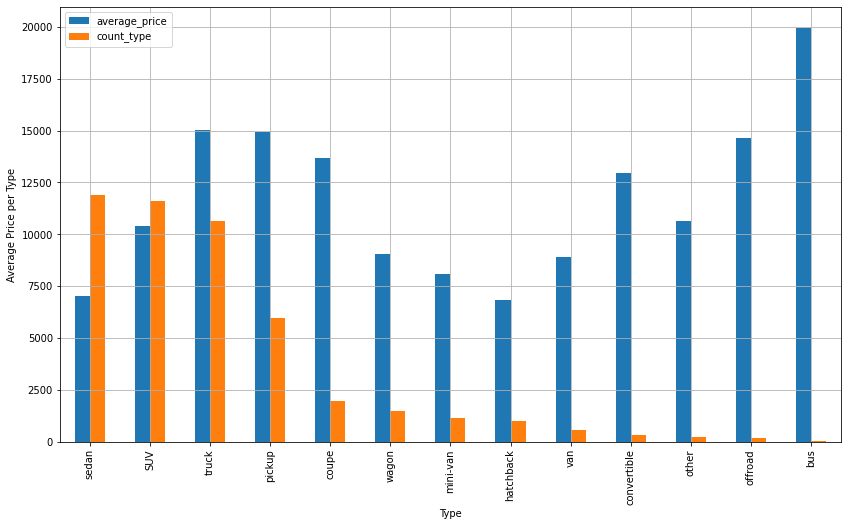

In [114]:
# Membuat grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan
new_pivot_type.plot(kind='bar', grid=True, figsize=(14, 8))
plt.ylabel('Average Price per Type')
plt.xlabel('Type')
plt.show()

Grafik sudah berhasil ditampilkan menggunakan data dari *pivot table* sebelumnya. Untuk grafik ini kita membuatnya menggunakan diagram batang dengan dua nilai pada setiap jenis kendaraannya, yaitu harga rata-rata kendaraan dan jumlah kendaraan pada setiap jenisnya. Perlu untuk diketahui bahwa untuk harga rata-rata kendaraan memiliki batang berwarna biru, sedangkan jumlah kendaraan pada setiap jenisnya memiliki batang berwarna oranye (dapat dilihat dalam *legend* pada bagian atas kiri grafik). Berikut ini merupakan kesimpulan dari hasil grafik batang yang sudah tersedia.

**Kesimpulan mengenai grafik**

Kita telah menemukan dua jenis kendaraan yang paling banyak diiklankan yaitu sedan dan SUV. Berikut ini merupakan penjelasan dari pernyataan kita sebelumnya:
- Jenis kendaraan sedan menduduki peringkat pertama dengan jenis kendaraan paling banyak iklannya. Kita bisa melihat secara jelas bahwa untuk **jumlah kendaraan dari jenis kendaraan ini sebanyak 11910 dan dengan harga rata-ratanya sebesar 7009**. Apa hubungannya dengan kedua pernyataan sebelumnya? Kita dapat menyatakan dari grafik di atas bahwa untuk jenis kendaraan sedan ini **harganya tergolong paling murah dengan jenis kendaraan lain sehingga untuk jumlah kendaraan yang diiklankan pun jumlahnya paling banyak**. Karena kita tahu bahwa harga kendaraan yang lebih murah memiliki peluang besar untuk terjual dengan cepat dan banyak sehingga jenis kendaraan ini semakin banyak juga diiklankan.
- Jenis kendaraan SUV menempati peringkat kedua dengan **jumlah kendaraannya sebanyak 11615 dan harga rata-ratanya sebesar 10382**. Sama seperti jenis kendaraan sedan, untuk kendaraan berjenis SUV jikalau kita perhatikan harga rata-ratanya juga tergolong cukup murah. Kita juga dapat beranggapan bahwa jenis kendaraan ini banyak diiklankan karena tergolong jenis kendaraan favorit.
- Bagaimana dengan jenis kendaraan bus? Berbeda dengan jenis kendaraan yang paling banyak iklannya, untuk jenis kendaraan ini kalau diperhatikan **harga rata-ratanya sangat tinggi dibandingkan dengan seluruh jenis kendaraan**. Jumlah harganya yaitu sebesar **19959.16**. Kita beranggapan harga rata-rata dari jenis kendaraan ini paling tinggi karena untuk kendaraan jenis bus memiliki ukuran dan suspensi yang besar. Karena harganya yang tergolong mahal maka hanya sedikit saja yang mau mengiklankan jenis kendaraan ini, yaitu sebanyak **18 kendaraan**.

## Faktor Harga

Pengerjaan bagian proyek sekarang ini adalah dengan menentukan faktor-faktor yang paling memengaruhi harga kendaraan dan menjadi bagian akhir dari pengerjaan proyek saat ini. Kegiatan yang akan kita lakukan yaitu dengan mencari korelasi antara harga kendaraan dengan beberapa parameter tertentu yang terdapat dalam *dataset*. Berikut ini merupakan parameter yang akan kita selidiki:
- Usia kendaraan (berdasarkan kolom `car_age`)
- Jarak tempuh kendaraan (berdasarkan kolom `odometer`)
- Kondisi kendaraan (berdasarkan kolom `condition_metric`)
- Tipe transmisi kendaraan (dari kolom `transmission`), dan
- Warna kendaraan (dari kolom `paint_color`).

Untuk mencari faktor yang paling memengaruhi harga kendaraan saat ini, kita akan mengambilnya berdasarkan dua jenis kendaraan populer dari hasil analisis kita pada tahapan sebelumnya. Itu berarti kita akan melakukan dua analisis berbeda pada masing-masing jenis kendaraan populer. Kita beritahu kembali, untuk dua jenis kendaraan populernya adalah sedan dan SUV. Perlu untuk diberitahu, untuk mencari korelasi terhadap faktor-faktor yang akan kita selidiki nantinya akan menggunakan *scatterplot* khusus untuk kolom numerik dan sisanya untuk kolom kategorik akan kita buat sebuah grafik *boxplot*.

### Faktor-Faktor yang Memengaruhi Harga Kendaraan Jenis Sedan

Saat ini kita akan mencari faktor apa saja yang dapat memengaruhi harga kendaraan dari jenis kendaraan sedan. Hal pertama yang akan kita analisis terlebih dahulu yaitu untuk kolom-kolom yang bersifat numerik dengan menggunakan *scatterplot*. Sebenarnya kita juga dapat menggunakan metode `.corr()` untuk mencari nilai korelasinya, tetapi kita akan tetap menggunakan grafik *scatterplot* sebagai gambarannya. Berikut ini merupakan informasi penting yang telah kita tuliskan saat menafsirkan hasil korelasi pada kolom-kolom numerik selanjutnya (disadur dari dummies.com):
- **–1**: memiliki korelasi negatif yang sempurna
- **-0.70**: memiliki korelasi kuat negatif
- **-0.50**: memiliki korelasi sedang negatif
- **-0.30**: memiliki korelasi lemah negatif
- **0**: tidak memiliki korelasi
- **+0.30**: memiliki korelasi lemah positif
- **+0.50**: memiliki korelasi sedang positif
- **+0.70**: memiliki korelasi kuat positif
- **+1**: memiliki korelasi positif yang sempurna

Ingat! Makin dekat koefisiennya dengan -1 atau 1, makin kuat ketergantungannya. Nilai yang mendekati 0 menandakan adanya koneksi yang lemah, sedangkan nilai 0 bisa diartikan bahwa tidak ada koneksi. Hal kedua yang akan kita lakukan adalah membuat *boxplot* untuk kolom-kolom yang sifatnya kategorik dengan syarat setidaknya setiap kategori dalam suatu kolom memiliki 50 iklan.

**Mencari faktor-faktor yang memengaruhi harga kendaraan pada kolom numerik**

Kita akan melakukan analisis korelasi pada suatu parameter menggunakan kolom-kolom numerik. Kolom-kolom yang akan kita periksa nilai korelasinya adalah `car_age`, `odometer`, dan `condition_metric`. Mari kita terlebih dahulu menyaring data dalam *dataset* baru kita dengan kondisi jenis kendaraannya hanya sedan saja.

In [115]:
# Menyaring data yang berisikan jenis kendaraan sedan
new_sedan = new_df_3[new_df_3['type'] == 'sedan'].reset_index(drop=True)

Sekarang kita sudah memiliki variabel baru yang menampung data dengan jenis kendaraannya hanya sedan. Selanjutnya mari kita mencari nilai korelasi harga kendaraan terhadap kolom-kolom numerik dalam variabel baru tersebut menggunakan atribut `.corr()`.

In [116]:
# Menampilkan nilai korelasi dalam variabel `new_sedan`
new_sedan.corr()['price']

price               1.000000
model_year          0.618469
cylinders          -0.045959
odometer           -0.517602
is_4wd              0.035058
days_listed         0.000003
year_posted         0.016813
month_posted       -0.019037
week_posted        -0.005049
car_age            -0.615093
average_odometer    0.229294
condition_metric    0.287719
Name: price, dtype: float64

Nilai korelasi harga terhadap beberapa kolom sudah dapat dilihat sekarang. Kita sebenarnya dapat menyimpulkan ketiga parameter yang akan kita analisis hanya melalui data di atas. Tetapi kita akan membuat *scatterplot*-nya masing-masing dan menjelaskan arti dari grafik yang disajikan beserta nilainya yang dapat diambil dari nilai korelasi sebelumnya. Mari kita mulai dari kolom `car_age` terlebih dahulu.

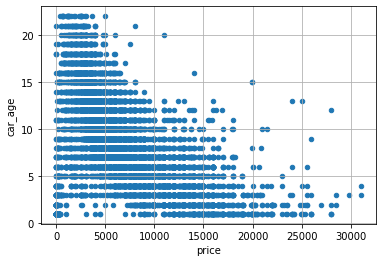

In [117]:
# Membuat scatterplot korelasi harga terhadap usia kendaraan untuk jenis kendaraan sedan
new_sedan.plot(kind='scatter', x='price', y='car_age', grid=True)
plt.show()

Berdasarkan sajian grafik di atas kita dapat melihat sebuah pola grafik yang menurun. Kita dapat menyimpulkan bahwa **usia kendaraan memiliki korelasi negatif yang cukup kuat terhadap harga kendaraan**. Ini juga dapat kita lihat dari nilai korelasinya yang cukup tinggi yaitu **-0.615093**. Arti dari grafik di atas adalah **semakin tinggi usia kendaraannya, maka semakin murah juga harga kendaraannya**. Kalimat sebelumnya jelas bahwa usia kendaraan yang sudah termakan oleh usia nilai jualnya akan semakin rendah. Hal ini dapat dibuktikan dengan semakin banyak titik yang berkumpul ke sebelah kiri grafik.

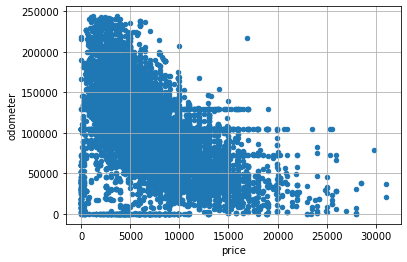

In [118]:
# Membuat scatterplot korelasi harga terhadap jarak tempuh kendaraan untuk jenis kendaraan sedan
new_sedan.plot(kind='scatter', x='price', y='odometer', grid=True)
plt.show()

Grafik di atas menampilkan informasi mengenai hubungan antara harga kendaraan terhadap jarak jenpuh kendaraan. Pola dari kumpulan titik terlihat serupa dengan hubungan antara usia kendaraan dengan harga kendaraan, yaitu cenderung menurun. Arti dari pola tersebut mengindikasikan bahwa **jarak tempuh kendaraan memiliki korelasi negatif yang sedang terhadap harga kendaraan**. Untuk nilai korelasinya menunjukkan pada angka **-0.517602**. Jikalau kita menjelaskannya dalam bentuk kalimat, **semakin tinggi jarak tempuh yang ada pada suatu kendaraan, maka harganya cenderung akan menurun**. Kalau kita melihat kumpulan titiknya cenderung berkumpul ke bagian kiri grafik dan ini sudah cukup menjelaskan bertambahnya nilai dalam sumbu Y mengakibatkan nilai dalam sumbu X berkurang.

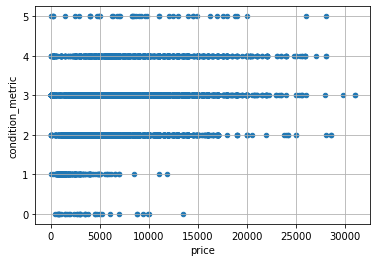

In [119]:
# Membuat scatterplot korelasi harga terhadap jarak kondisi kendaraan untuk jenis kendaraan sedan
new_sedan.plot(kind='scatter', x='price', y='condition_metric', grid=True)
plt.show()

*Scatterplot* dari korelasi antara harga kendaraan terhadap jarak kondisi kendaraan sudah dapat dilihat dan diinterpretasikan hasilnya. Dari grafik yang telah disajikan, kita dapat melihat bahwa pola dari *scatterplot*-nya terlihat tidak jelas. Melalui pernyataan sebelumnya kita dapat mengetahui bahwa **kondisi kendaraan memiliki korelasi positif yang lemah terhadap harga kendaraan**. Nilai korelasi yang didapatkan dari kedua hubungan parameter saat ini adalah **0.287719**. Sehingga kita dapat mengartikan bahwa **walaupun harga kendaraannya berubah, tetapi untuk kualitasnya tetap saja sama**.

**Mencari faktor-faktor yang memengaruhi harga kendaraan pada kolom kategorik**

Setelah melakukan analisis korelasi antara harga kendaraan jenis sedan dengan beberapa parameter dalam kolom numerik, selanjutnya kita akan menganalisis korelasi yang sama dengan parameter dalam kolom kategorik. Kolom tersebut adalah `transmission` dan `paint_color`. Berbeda dengan pengerjaan sebelumnya, saat ini kita akan mengukurnya menggunakan *boxplot*. Sebagai informasi, kita perlu memerhatikan bahwa syarat yang sah dalam menganalisis kolom kategorik yaitu setiap kategori dalam satu kolom setidaknya memiliki 50 iklan. Sebelum membuat boxplot-nya kita perlu mencari nilai unik dalam kolom `transmission` terlebih dahulu untuk memeriksa jumlah iklan pada setiap kategorinya.

In [120]:
# Mencari nilai unik kolom `transmission` untuk mengecek jumlah iklan pada setiap kategorinya
new_sedan['transmission'].value_counts()

automatic    11215
manual         564
other          131
Name: transmission, dtype: int64

Hasil dari nilai unik di atas menggambarkan jumlah masing-masing kateogri dalam kolom `transmission`. Dapat diperhatikan bahwa jumlah kendaraan pada masing-masing kategori sudah memenuhi syarat melebihi dari 50. Kalau kita perhatikan transmisi kendaraan *automatic* untuk jenis kendaraan sedan jumlahnya lebih banyak. Mari kita membuat grafik *boxplot* yang menjelaskan hubungan antara harga kendaraan dengan transmisi kendaraan.

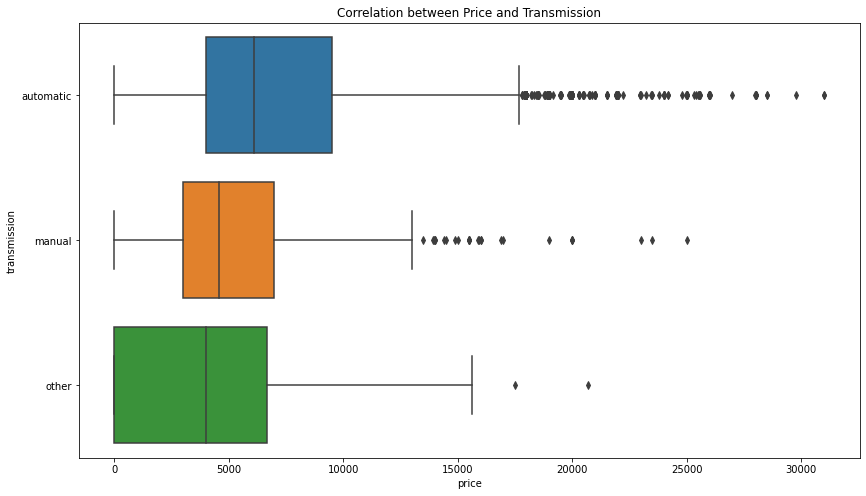

In [121]:
# Membuat boxplot korelasi antara harga kendaraan dengan transmisi untuk jenis kendaraan sedan
plt.figure(figsize=(14, 8))
sns.boxplot(data=new_sedan, x='price', y='transmission')
plt.title('Correlation between Price and Transmission')
plt.show()

Boxplot mengenai hubungan antara harga kendaraan jenis sedan dengan transmisi kendaraan sudah dapat ditampilkan. Kita mengetahui bahwa untuk ketiga kategori memiliki nilai *outlier* yang melebihi batas atas dari masing-masing *whisker*. Melalui grafik tersebut kita dapat menjelaskan mengenai:
- Bagian boxplot dengan transmisi kendaraannya *automatic* untuk jenis kendaraan sedan jikalau dilihat memiliki nilai median harga kendaraannya tertinggi dengan dua transmisi kendaraan lainnya. Hal ini menandakan bahwa untuk jenis kendaraan sedan yang transmisinya *automatic* memiliki harga rata-rata yang lebih mahal
- Transmisi kendaraan *manual* untuk jenis kendaraan sedan memiliki ukuran *box* paling kecil dan arti dari pernyataan tersebut adalah sebaran harga dalam transmisi ini tidak terlalu menyebar. Nilai median harga kendaraannya terlihat tepat dibawah harga 5000 dan menjadi transmisi kendaraan kedua yang harga rata-ratanya cukup tinggi
- Untuk bagian boxplot dari kendaraan sedan yang transmisinya *other* memiliki nilai median paling rendah yang menandakan  harga kendaraan berjenis sedan untuk transmisi ini harganya lebih murah. Selain itu untuk panjang *box* dengan transmisi kendaraan ini lebih panjang. Hal ini menandakan bahwa untuk harga kendaraan berjenis sedan dengan transmisinya *other* memiliki sebaran harga yang bervariatif.

Kita sudah selesai menganalisis hubungan antara harga kendaraan dengan transmisinya. Sekarang kita akan lanjut menghubungkannya dengan parameter warna kendaraan menggunakan kolom `paint_color`. Sebelumnya kita akan mengecek terlebih dahulu untuk jumlah distribusi nilai pada setiap kategori dalam kolom tersebut, jikalau jumlahnya ada yang kurang dari 50, seperti yang telah disepakati kita tidak akan memasukkannya dalam analisis nanti.

In [122]:
# Mencari nilai unik kolom `paint_color` untuk mengecek jumlah iklan pada setiap kategorinya
new_sedan['paint_color'].value_counts()

unknown    2135
silver     2017
black      1752
grey       1604
white      1475
blue       1212
red         929
custom      293
brown       248
green       192
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64

Dari hasil distribusi jumlah nilai pada setiap kategori warna kendaraan untuk jenis kendaraan sedan saat ini, kita menemukan sebuah fakta bahwa untuk warna kendaraan ***purple*, *yellow*, dan *orange*** memiliki jumlah iklan paling sedikit, yaitu tepat di bawah 50. Melalui pernyataan sebelumnya mari kita mengecualikan tiga baris akhir dari data di atas menggunakan indeks baris.

In [123]:
# Menghapus warna kendaraan yang jumlah iklannya di bawah 50
new_sedan['paint_color'].value_counts()[:-3]

unknown    2135
silver     2017
black      1752
grey       1604
white      1475
blue       1212
red         929
custom      293
brown       248
green       192
Name: paint_color, dtype: int64

Kita sudah berhasil menyingkirkan 3 warna kendaraan untuk jenis kendaraan sedan saat ini menggunakan indeks dengan cara hanya menampilkan seluruh baris tanpa tiga baris terakhir. Selanjutnya mari kita membuat hasil data di atas menjadi sebuah *list* sebelum diiris menggunakan *dataset* `new_sedan` dan menyimpannya dalam variabel baru.

In [124]:
# Menyimpan hasil temuan kita sebelumnya
paint_color_included = list(new_sedan['paint_color'].value_counts()[:-3].index)

Kerja yang baik. Sekarang mari kita terapkan hasil pengirisan dalam kondisi sebelumnya ke dalam irisan data baru pada *dataset* `new_sedan`.

In [125]:
# Mengiris data menggunakan kondisi yang warna kendaraannya sudah dibuang untuk iklan yang jumlahnya di bawah 50
new_sedan_color = new_sedan[new_sedan['paint_color'].isin(paint_color_included).reset_index(drop=True)]

Kita sudah berhasil menghapus data untuk warna kendaraan yang jumlahnya kurang dari 50 iklan. Tahap selanjutnya yaitu kita perlu untuk membuat grafik *boxplot* untuk menjelaskan hubungan antara harga kendaraan dengan warna kendaraan pada jenis kendaraan sedan.

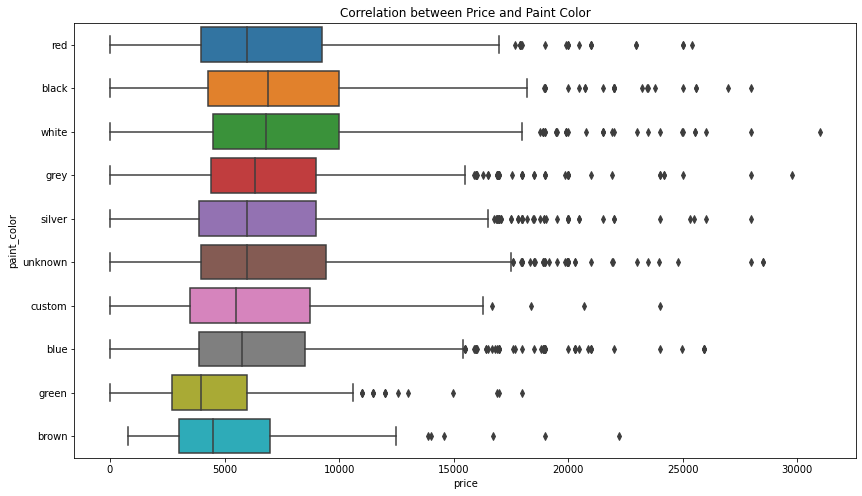

In [126]:
# Membuat boxplot antara harga kendaraan dengan warna kendaraan untuk jenis kendaraan sedan
plt.figure(figsize=(14, 8))
sns.boxplot(data=new_sedan_color, x='price', y='paint_color')
plt.title('Correlation between Price and Paint Color')
plt.show()

Grafik mengenai boxplot yang menjelaskan kedua nilai antara harga kendaraan dengan warna kendaraan untuk jenis kendaraan sedan jika dilihat memiliki 10 *box* dengan gambaran yang berbeda-beda. Berikut ini merupakan penjelasan dari temuan yang telah kita dapatkan:
- Dilihat dari nilai mediannya, untuk setiap warna kendaraan memiliki nilai median yang bervariasi dan tampaknya tidak terlalu jauh satu dengan yang lainnya. Hal tersebut mengindikasikan kepada kita bahwa harga rata-rata pada setiap warna kendaraan untuk jenis kendaraan sedan ini jumlahnya hampir sama satu dengan yang lain
- Kalau diperhatikan untuk sebaran nilai *outlier* pada setiap *box*-nya tidak begitu jauh satu sama lain. Sehingga harga kendaraan untuk jenis kendaraan sedan tidak dipengaruhi oleh warna kendaraannya
- Jikalau kita perhatikan dengan cermat, untuk nilai median dari harga kendaraan yang berwarna hijau (*green*) cenderung lebih rendah. Itu artinya untuk warna kendaraan tersebut memiliki harga yang jauh lebih murah dibandingkan dengan warna mobil yang lain
- Untuk nilai median tertinggi mengenai harga rata-rata kendaraan berdasarkan warnanya, hitam (*black*) terlihat unggul dalam hal ini. Berarti untuk kendaraan berwarna hitam dengan jenis kendaraan sedan memiliki harga yang lebih mahal dibandingkan dengan warna lainnya. Hal ini juga disusul oleh warna kendaraan putih (*white*) yang harga rata-ratanya tidak jauh berbeda.

**Kesimpulan mengenai faktor-faktor yang memengaruhi harga kendaraan jenis sedan**

Eksplorasi dan analisis sudah kita lakukan dalam mencari fakta apa saja yang memengaruhi harga kendaraan berjenis sedan. Sejauh ini analisis dilakukan dengan baik, namun untuk bagian pengerjaan saat kita ingin membuat boxplot untuk kolom `paint_color` kita menemukan ada tiga warna kendaraan yang jumlahnya tidak sesuai dengan kriteria analisis sehingga kita memutuskan untuk menyingkirkannya. Berikut ini kesimpulan singkat per poin yang kita dapatkan sejauh ini:
- Usia kendaraan memiliki korelasi negatif yang cukup kuat terhadap harga kendaraan (-0.615093)
- Jarak tempuh kendaraan memiliki korelasi negatif yang sedang terhadap harga kendaraan (-0.517602)
- Kondisi kendaraan memiliki korelasi positif yang lemah terhadap harga kendaraan (0.287719)
- Mengenai transmisi kendaraan dengan harga kendaraan kita telah menemukan beberapa hal. Untuk jenis kendaraan sedan yang transmisinya *automatic* memiliki harga rata-rata yang lebih mahal. Bagi transmisi kendaraan unik (*other*) memiliki nilai median paling rendah yang menandakan harga kendaraan berjenis sedan ini harganya lebih murah dan untuk harganya lebih bervariatif
- Mengenai warna kendaraan dengan harga kendaraan terdapat beberapa fakta unik. Dari harga rata-rata pada setiap warna kendaraan untuk jenis kendaraan sedan ini jumlahnya hampir sama satu dengan yang lain. Lalu untuk jenis kendaraan ini tidak dipengaruhi oleh warna kendaraannya.

### Faktor-Faktor yang Memengaruhi Harga Kendaraan Jenis SUV

Pekerjaan akhir kita saat ini akan fokus untuk mencari faktor apa saja yang dapat memengaruhi harga kendaraan dari jenis kendaraan SUV. Sama halnya dengan pekerjaan sebelumnya, kita akan menganalisis untuk kolom-kolom yang bersifat numerik dengan menggunakan *scatterplot* terlebih dahulu. Tidak hanya *scatterplot* saja, kita akan menampilkan nilai korelasi dari harga kendaraan terhadap seluruh kolom numerik dalam *dataset*. Agar kita tidak kesulitan dalam menginterpretasikan hasil korelasi, di bawah ini adalah informasi yang telah kita salin kembali untuk menafsirkan hasil korelasi pada kolom-kolom numerik (disadur dari dummies.com):
- **–1**: memiliki korelasi negatif yang sempurna
- **-0.70**: memiliki korelasi kuat negatif
- **-0.50**: memiliki korelasi sedang negatif
- **-0.30**: memiliki korelasi lemah negatif
- **0**: tidak memiliki korelasi
- **+0.30**: memiliki korelasi lemah positif
- **+0.50**: memiliki korelasi sedang positif
- **+0.70**: memiliki korelasi kuat positif
- **+1**: memiliki korelasi positif yang sempurna

Ingat! Makin dekat koefisiennya dengan -1 atau 1, makin kuat ketergantungannya. Nilai yang mendekati 0 menandakan adanya koneksi yang lemah, sedangkan nilai 0 bisa diartikan bahwa tidak ada koneksi. Setelah mencari nilai korelasi terhadap kolom-kolom numerik, langkah akhir yang akan kita lakukan nanti adalah membuat boxplot untuk kolom-kolom yang sifatnya kategorik. Ingat, syarat sah setidaknya setiap kategori dalam suatu kolom memiliki 50 iklan.

**Mencari faktor-faktor yang memengaruhi harga kendaraan pada kolom numerik**

Kesempatan pertama saat ini kita akan melihat korelasi pada suatu parameter menggunakan kolom-kolom numerik. Kolom-kolom yang akan kita periksa nilai korelasinya ada `car_age`, `odometer`, dan `condition_metric`. Namun sebelum kita mencari nilai korelasinya, hal wajib yang perlu dilakukan yaitu menyaring data dalam *dataset* `new_df_3` dengan kondisi jenis kendaraannya hanya SUV. Tanpa terlalu lama mari kita kerjakan bagian ini sekarang juga.

In [127]:
# Menyaring data yang berisikan jenis kendaraan SUV
new_suv = new_df_3[new_df_3['type'] == 'SUV'].reset_index(drop=True)

Hasil dari penyaringan dengan jenis kendaraan hanya SUV sudah berhasil disaring dan disimpan dalam variabel `new_suv`. Seperti yang sudah dilakukan dan direncanakan sebelumnya, di bawah penjelasan ini kita akan menampilkan nilai korelasi untuk harga kendaraan (`price`) terhadap seluruh kolom numerik dari variabel di atas menggunakan atribut `.corr()`.

In [128]:
# Menampilkan nilai korelasi dalam variabel `new_suv`
new_suv.corr()['price']

price               1.000000
model_year          0.573439
cylinders          -0.008287
odometer           -0.471418
is_4wd              0.113479
days_listed        -0.014709
year_posted        -0.001686
month_posted       -0.004332
week_posted         0.015811
car_age            -0.571569
average_odometer    0.211117
condition_metric    0.253796
Name: price, dtype: float64

Korelasi harga terhadap seluruh kolom numerik terlihat sekarang. Perlu diperhatikan bahwa nilai korelasi yang telah kita temukan saat ini hanya akan digunakan sebagai referensi penjelasan kita saat menjelaskan korelasi harga dengan tiga kolom numerik menggunakan *scatterplot*. Fakta unik dari nilai korelasi di atas, untuk harga kendaraan berjenis SUV terhadap tahun kendaraan diluncurkan (`model_year`) adalah satu-satunya parameter yang memiliki nilai korelasi positif paling unggul. Kita akan menemukan korelasi harga kendaraan dengan usia kendaraan sesaat lagi.

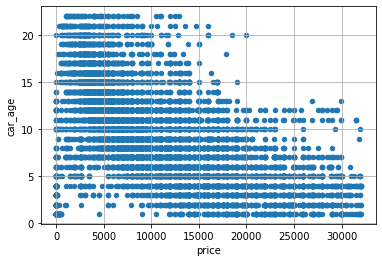

In [129]:
# Membuat scatterplot korelasi harga terhadap usia kendaraan untuk jenis kendaraan SUV
new_suv.plot(kind='scatter', x='price', y='car_age', grid=True)
plt.show()

*Scatterplot* untuk menunjukkan korelasi harga dengan usia kendaraan jenis SUV dapat kita cermati saat ini. Bicara mengenai pola, jika dilihat dari bagian kiri atas hingga kanan bawah grafik sudah cukup menjelaskan kepada kita bahwa korelasi dalam bagian ini menunjukkan nilai yang negatif (menurun ke bawah). Nilainya sama dengan pernyataan kita sebelumnya, yaitu **-0.571569**. Dalam bentuk sebuah kalimat, kita dapat memberikan argumen bahwa **semakin tinggi usia kendaraan akan menurunkan harga jual dari kendaraannya**. Atau dalam artian lainnya adalah untuk usia kendaraan yang semakin tua biasanya harga jualnya tidak terlalu tinggi. Jikalau kita simpulkan mengenai korelasi saat ini dalam konteks jenis kendaraan SUV, **usia kendaraan memiliki korelasi sedang yang negatif terhadap harga kendaraan**.

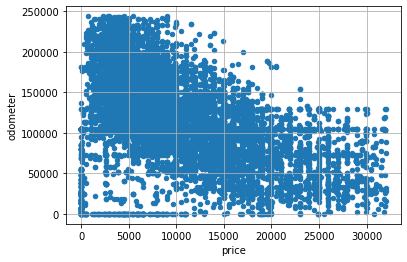

In [130]:
# Membuat scatterplot korelasi harga terhadap jarak tempuh kendaraan untuk jenis kendaraan SUV
new_suv.plot(kind='scatter', x='price', y='odometer', grid=True)
plt.show()

Korelasi hubungan antara harga terhadap jarak tempuh kendaraan dapat dilihat hasilnya dalam grafik di atas penjelasan ini. Tren atau pola dari grafik menjelaskan kepada kita bahwa nilai korelasinya negatif, walaupun tidak terlalu kuat. Nilai korelasi dari grafik di atas adalah **-0.471418**. Pendapat kita mengenai nilai korelasi beserta grafik yang sudah dipaparkan saat ini adalah **semakin tinggi jarak tempuh pada kendaraan akan menurunkan harga jualnya meskipun tidak selalu**. Jarak tempuh kendaraan yang tinggi mengindikasikan bahwa kendaraan sudah sering dipakai sehingga bisa saja kualitasnya menurun dan harga jualnya bisa juga berkurang. Mari kita simpulkan pernyataan-pernyataan yang sudah kita jelaskan sebelumnya. Dalam konteks kendaraan berjenis SUV, **jarak tempuh kendaraan memiliki korelasi negatif yang lemah terhadap harga kendaraan**.

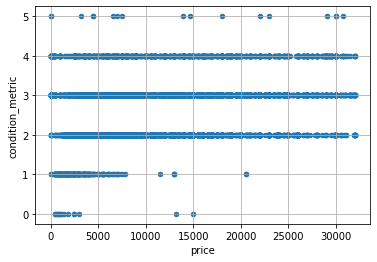

In [131]:
# Membuat scatterplot korelasi harga terhadap jarak kondisi kendaraan untuk jenis kendaraan SUV
new_suv.plot(kind='scatter', x='price', y='condition_metric', grid=True)
plt.show()

Korelasi menggunakan *scatterplot* akhir pada analisis kita saat ini dapat menjawab apakah adanya hubungan antara kondisi kendaraan dengan harga kendaraan. Kita bahas terlebih dahulu mengenai tren atau polanya. Menurut sajian dari grafik, polanya terlihat tidak jelas dan seperti simetris horizontal bentuknya. Untuk nilai korelasinya adalah **0.253796**. Argumen kita mengenai pernyataan sebelumnya adalah ketika harga kendaraannya naik maupun turun, untuk kualitas kendaraannya tidak berubah. Kesimpulan akhir dari penjelasan korelasi saat ini untuk konteks kendaraan berjenis SUV yaitu **kondisi kendaraan memiliki korelasi positif yang sangat lemah terhadap harga kendaraan**.

**Mencari faktor-faktor yang memengaruhi harga kendaraan pada kolom kategorik**

Analisis korelasi harga kendaraan dengan beberapa parameter numerik dalam konteks jenis kendaraan SUV telah kita tuntaskan pengerjaannya. Pekerjaan kita belum selesai sampai saat ini karena kita hanya perlu untuk menganalisis dengan dua parameter dalam kolom kategorik seperti yang sudah kita jelaskan pada awal pengerjaan tugas ini. Kolom yang akan dianalisis yaitu `transmission` dan `paint_color` menggunakan grafik *boxplot*. Kita tidak jenuh untuk mengingatkan bahwa syarat sah suatu kategori dalam suatu kolom setidaknya memiliki 50 iklan. Sebelum kita terjun langsung, kita harus melihat jumlah iklan pada setiap kategori dalam kolom `transmission` terlebih dahulu.

In [132]:
# Mencari nilai unik kolom `transmission` untuk mengecek jumlah iklan pada setiap kategorinya
new_suv['transmission'].value_counts()

automatic    11015
manual         443
other          157
Name: transmission, dtype: int64

Data di atas sudah menunjukkan jumlah dari seluruh kategori dalam kolom kategorik `transmission`. Melalui hasil yang dipaparkan, untuk jumlah kendaraan atau jumlah iklan dalam masing-masing kategori melebihi syarat minimum untuk dianalisis. Fakta menarik dari data yang ada saat ini adalah untuk transmisi kendaraan dari jenis SUV yang *automatic* jumlahnya sangat tinggi dibandingkan dengan lainnya. Selanjutnya kita akan membuat grafik *boxplot* untuk menjelaskan hubungan antara harga kendaraan dengan transmisi kendaraan.

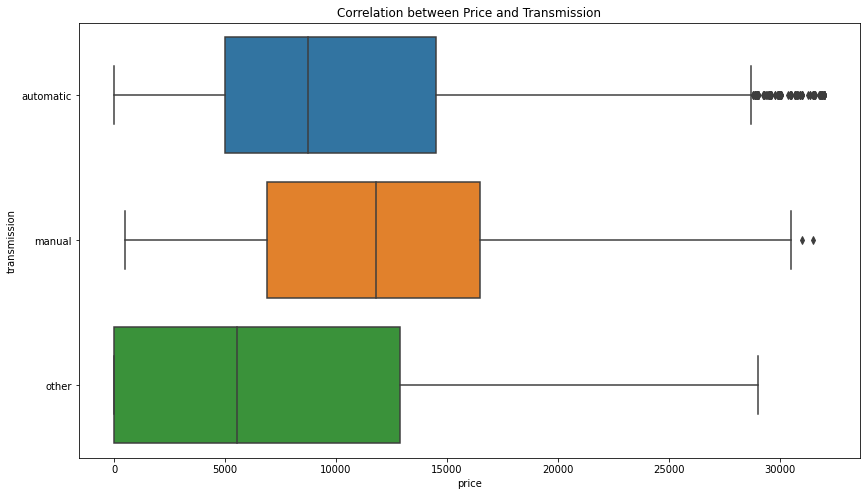

In [133]:
# Membuat boxplot korelasi antara harga kendaraan dengan transmisi untuk jenis kendaraan SUV
plt.figure(figsize=(14, 8))
sns.boxplot(data=new_suv, x='price', y='transmission')
plt.title('Correlation between Price and Transmission')
plt.show()

*Boxplot* mengenai nilai dalam kolom `price` dengan `transmission` saat ini sudah disajikan dan dapat kita interpretasikan. Jikalau kita bandingkan dengan boxplot dari pekerjaan analisis sebelumnya untuk jenis kendaraan sedan, kita menemukan beberapa perbedaan yang cukup signifikan. Berikut ini adalah temuan yang kita sampaikan berdasarkan grafik yang telah tersedia:
- Nilai median untuk setiap transmisi kendaraan terlihat lebih bervariasi dan tidak terlalu jauh jaraknya, kecuali untuk transmisi yang unik (*other*)
- Untuk jenis transmisi kendaraan *other* nilai mediannya terlihat paling rendah, sehingga harga kendaraan dari transmisi ini cenderung dihargai lebih murah dibandingkan dengan transmisi lainnya
- Sebaliknya dari transmisi yang unik, untuk transmisi kendaraan *manual* terlihat lebih dihargai dengan harga jual yang mahal
- Transmisi antara *manual* dengan *automatic* memiliki kuartil bawah (Q1), kuartil atas (Q3), dan median yang terbilang cukup berdekatan sehingga harga jualnya cenderung tidak ada perbedaannya
- Transmisi untuk *automatic* dan *manual* adalah transmisi yang memiliki nilai pencilan, sehingga jenis transmisi tersebut tidak memiliki pengaruh dengan harga jual kendaraan untuk konteks jenis kendaraan SUV.

Analisis hubungan antara harga kendaraan dengan transmisi untuk jenis kendaraan SUV sudah rampung pengerjaannya. Pekerjaan akhir dari proyek ini akan kita lakukan analisis dengan parameter warna kendaraan dari kolom `paint_color`. Seperti yang telah kita setujui bahwa sebelum masuk dalam analisis kita perlu untuk melihat terlebih dahulu distribusi nilai pada setiap kategori dalam kolom `paint_color`, apakah ada kategorinya yang memiliki jumlah iklan kurang dari 50 atau tidak. Jikalau ada maka kita akan memisahkannya dari analisis kita selanjutnya.

In [134]:
# Mencari nilai unik kolom `paint_color` untuk mengecek jumlah iklan pada setiap kategorinya
new_suv['paint_color'].value_counts()

unknown    2090
black      2038
white      1818
silver     1512
grey       1130
blue        992
red         844
green       390
brown       349
custom      291
orange       81
yellow       45
purple       35
Name: paint_color, dtype: int64

Berdasarkan hasil distribusi jumlah nilai pada setiap kategori warna kendaraan untuk jenis kendaraan SUV, sepertinya kita menemukan ada dua kategori yang jumlah iklannya kurang dari 50. Dua kategori itu ialah ***yellow* dan *purple***. Seperti yang sudah dijelaskan dan disepakati kita akan mengecualikan dua kategori tersebut dengan cara seperti berikut ini.

In [135]:
# Mengecualikan warna kendaraan yang jumlah iklannya di bawah 50
new_suv['paint_color'].value_counts()[:-2]

unknown    2090
black      2038
white      1818
silver     1512
grey       1130
blue        992
red         844
green       390
brown       349
custom      291
orange       81
Name: paint_color, dtype: int64

Tebak apa yang telah kita lakukan sekarang? Kita sudah mengecualikan dua kategori warna kendaraan yang jumlah iklannya kurang dari syarat menggunakan dua indeks terakhir dari baris data di atas. Pekerjaan kita untuk menghapus nilai bermasalah ini belum selesai sampai sini. Kita perlu memuat hasil data di atas menjadi sebuah *list* sebelum diiris menggunakan *dataset* kita dan menyimpannya dalam variabel lain.

In [136]:
# Menyimpan hasil temuan kita sebelumnya
color_included = list(new_suv['paint_color'].value_counts()[:-2].index)

Usaha kita telah berhasil. Kita telah menyimpan pengecualian data sebelumnya dalam variabel `color_included`. Sekarang mari kita terapkan hasil pengirisan dalam kondisi sebelumnya ke dalam irisan data baru dalam *dataset* new_suv.

In [137]:
# Mengiris data menggunakan kondisi yang warna kendaraannya sudah dibuang untuk iklan yang jumlahnya di bawah 50
new_suv_color = new_suv[new_suv['paint_color'].isin(color_included).reset_index(drop=True)]

Pekerjaan kita dalam menghapus data untuk warna kendaraan yang jumlahnya kurang dari 50 iklan telah usai. Tahap penting selanjutnya yang menentukan hasil analisis kita yaitu dengan membuat grafik *boxplot* untuk menjelaskan hubungan antara harga kendaraan dengan warna kendaraan pada jenis kendaraan SUV. Untuk kodenya kita bisa rujuk kembali dalam analisis kita sebelumnya.

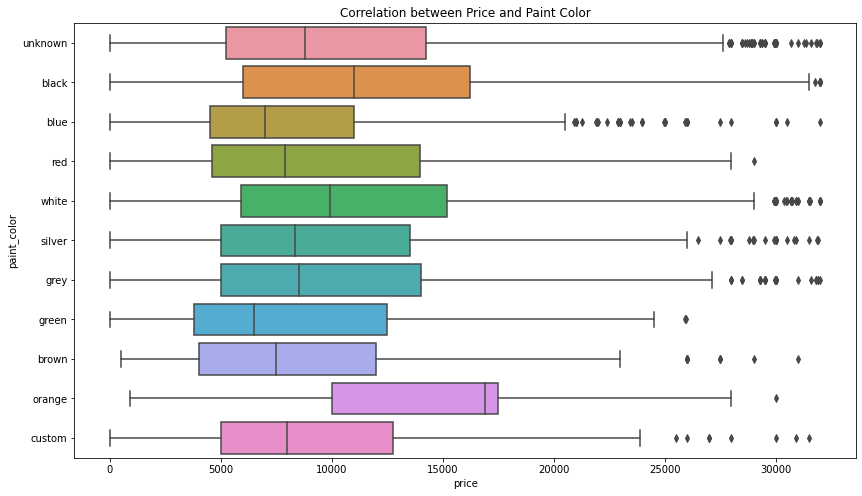

In [138]:
# Membuat boxplot antara harga kendaraan dengan warna kendaraan untuk jenis kendaraan SUV
plt.figure(figsize=(14, 8))
sns.boxplot(data=new_suv_color, x='price', y='paint_color')
plt.title('Correlation between Price and Paint Color')
plt.show()

Hubungan antara nilai harga kendaraan dengan warna kendaraan untuk kolom kategorik saat ini dapat dipahami melalui *boxplot*  di atas. Secara jumlah kita dapat melihat dalam grafik saat ini memiliki 11 *box* yang mewakili masing-masing kategori warna. Kita telah menemukan beberapa informasi yang cukup menarik dari *boxplot* ini, di antarannya yaitu:
- Berdasarkan jarak nilai median setiap warna kendaraan, kita menemukan fakta bahwa untuk setiap kendaraan memiliki nilai yang bervarasi dan nampak hampir berjauhan satu dengan yang lain meskipun tidak semuanya. Hal tersebut menyiratkan kepada kita bahwa untuk harga rata-rata setiap warna kendaraan yang nilai mediannya berjauhan memiliki harga yang berbeda satu dengan lainnya
- Warna kendaraan hijau (*green*) terlihat memiliki nilai median paling rendah. Berdasarkan pernyataan sebelumnya kita dapat mengetahui bahwa harga kendaraan untuk warna ini cenderung lebih murah dibandingkan dengan warna kendaraan lainnya
- Kebalikan dari temuan sebelumnya, kita melihat bahwa warna kendaraan oranye (*orange*) berdasarkan nilai mediannya dapat mengartikan bahwa harga jualnya paling tinggi dibandingkan dengan warna kendaraan lain untuk konteks kendaraan berjenis SUV
- Transmisi antara warna kendaraan *silver* dengan *grey* memiliki kuartil bawah (Q1), kuartil atas (Q3), dan median yang terbilang cukup berdekatan sehingga harga jualnya cenderung tidak ada perbedaannya
- Jika diperhatikan untuk sebaran nilai *outlier* pada setiap *box*-nya tidak begitu jauh satu sama lain, kecuali untuk warna kendaraan hijau (*green*), oranye (*orange*), dan merah (*red*). Sehingga harga kendaraan untuk jenis kendaraan SUV tidak dipengaruhi oleh warna kendaraannya.

**Kesimpulan mengenai faktor-faktor yang memengaruhi harga kendaraan jenis SUV**

Pengerjaan proyek bagian akhir ini untuk menemukan beberapa faktor antara harga kendaraan untuk kendaraan berjenis SUV sudah rampung dan membuahkan hasil. Kita perlu melaporkan bahwa untuk kolom `paint_color` memiliki dua kategori warna kendaraan yang tidak bisa kita masukkan untuk dianalisis, yaitu untuk warna kendaraan kuning (*yellow*) dan ungu (*purple*). Dengan demikian dari hasil pekerjaan kita hingga saat ini, berikut beberapa kesimpulan yang kita dapatkan pada masing-masing parameter:
- Usia kendaraan memiliki korelasi sedang yang negatif terhadap harga kendaraan (-0.571569)
- Jarak tempuh kendaraan memiliki korelasi negatif yang lemah terhadap harga kendaraan (-0.471418)
- Kondisi kendaraan memiliki korelasi positif yang sangat lemah terhadap harga kendaraan (0.253796)
- Mengenai transmisi kendaraan dengan harga kendaraan kita sudah menemukan berbagai infomasi. Contohnya untuk jenis transmisi kendaraan *other* nilai mediannya terlihat paling rendah, sehingga harga kendaraan dari transmisi ini cenderung dihargai lebih murah dibandingkan dengan transmisi lainnya. Untuk transmisi kendaraan *manual* terlihat memiliki harga jual yang mahal dan untuk transmisi *automatic* dan *manual* tidak memiliki pengaruh dengan harga jual kendaraan untuk konteks jenis kendaraan SUV ini
- Mengenai warna kendaraan dengan harga kendaraan juga kita menemukan fakta yang tidak boleh dilewatkan. Salah satunya untuk harga rata-rata setiap warna kendaraan yang nilai mediannya berjauhan memiliki harga yang berbeda satu dengan lainnya. Kemudian warna kendaraan oranye (*orange*) berdasarkan nilai mediannya dapat mengartikan bahwa harga jualnya paling tinggi dibandingkan dengan warna kendaraan lain sedangkan untuk warna kendaraan hijau (*green*) merupakan kebalikannya. Terakhir yaitu harga kendaraan untuk jenis kendaraan SUV tidak dipengaruhi oleh warna kendaraannya.

## Kesimpulan Umum

Dimulai dari bagian eksplorasi data awal dan diakhiri dengan bagian pengerjaan proyek yang menantang, pada akhirnya kita sudah menyelesaikan semua kebutuhan dan perintah yang diberikan kepada kita untuk proyek saat ini. Ada banyak hal yang kita temui, pelajari, dan ambil aksi dari setiap keputusan yang muncul dari sebuah permasalahan sehingga kita dapat mengetahui bahwa tahapan eksplorasi data cakupannya luas dan memerlukan ketelitian sebelum menentukan sebuah kesimpulan. Untuk pengerjaan proyek yang paling menantang dan membutuhkan waktu yang panjang untuk dikerjakan yaitu dalam bagian menganalisis faktor harga terhadap beberapa parameter. Karena seluruh bagian dalam proyek ini telah selesai dikerjakan, maka dengan penuh semangat kita menginformasikan beberapa kesimpulan menyeluruh dari setiap langkah yang telah kita lakukan.

**Tahap Eksplorasi Awal**

Bagian pengerjaan proyek saat ini lebih fokus dalam eksplorasi mengenai informasi pada data yang diberikan kepada kita dengan cara melihat melihat nilai yang hilang, melihat ketepatan tipe data pada setiap kolom. Kita menemukan bahwa ada 5 kolom yang berisi nilai hilang dengan jumlah yang bervariatif. Kolomnya ada `is_4wd`, `paint_color`, `odometer`, `cylinders`, dan `model_year`. Untuk kolom-kolom yang memiliki tipe data aneh juga jumlahnya sama dengan nilai hilang, yaitu `price`, `model_year`, `cylinders`, `is_4wd`, dan `date_posted`.

**Mengatasi Nilai Hilang dan Tipe Data Bermasalah**

Pekerjaan kita dalam bagian ini tergolong mudah dan cepat untuk diselesaikan. Inti dari pekerjaan kita saat ini adalah mengisi nilai hilang untuk 5 kolom yang telah disebutkan. Berikut solusi dari pengisian data untuk 5 kolom dengan nilai hilang yang telah kita lakukan:
- `is_4wd`: kita telah mengisinya dengan nilai 0 dalam kondisi *Boolean* artinya ***False***
- `paint_color`: mengisinya dengan nilai ***unknown*** karena kita tidak tahu pasti setiap warna kendaraan yang hilang nilainya
- `odometer`: mengisi nilai hilang menggunakan nilai median berdasarkan kolom `condition`
- `cylinders`: mengisi nilai hilang menggunakan nilai median berdasarkan kolom `model`
- `model_year`: mengisi nilai hilang menggunakan nilai median berdasarkan kolom `model`.

Selain itu kita juga telah memperbaiki tipe data yang bermasalah dan berikut ini solusi yang sudah kita kerjakan:
- `price`: tipe datanya adalah integer dan sudah berubah menjadi ***float***
- `model_year`: tipe datanya adalah float dan sudah berubah menjadi ***integer***
- `cylinders`: tipe datanya adalah float dan sudah berubah menjadi ***integer***
- `is_4wd`: tipe datanya adalah float dan sudah berubah menjadi ***boolean***
- `date_posted`: tipe data dalam kolom ini adalah object dan sudah beralih menjadi ***datetime***.

**Pengategorian Data**

Fokus pekerjaan proyek bagian ini adalah dengan cara memperbaiki kualitas datanya agar dapat digunakan untuk tahapan eksplorasi dan analisis. Dalam tahapan pengerjaan ini juga kita telah menambahkan beberapa kolom baru dari hasil penjumlahan, pengurangan, dan pembagian beberapa kolom. Berikut ini hasil dari pekerjaan kita dalam pengategorian data:
- Menambahkan kolom mengenai hari dalam minggu, bulan, dan tahun iklan ditayangkan berdasarkan kolom `date_posted`
- Menambahkan kolom mengenai usia kendaraan (dalam tahun) ketika iklan ditayangkan dengan cara mengurangi tahun ketika kendaraan ditayangkan dengan tahun ketika kendaraan diluncurkan. Bagi yang hasil pengurangannya 0 terdapat sebanyak 2152 kolom, sehingga kita mengambil langkah dengan cara mengganti nilainya menjadi 1 untuk mencegah nilai tak terhingga (*infinite*) ketika kita mencari jarak tempuh kendaraan per tahun yang akan menggunakan kolom `car_age` sebagai pembaginya
- Menambahkan kolom mengenai jarak tempuh rata-rata kendaraan per tahun dengan cara mencari kolom yang berisi data mengenai jarak tempuh kendaraan dan membaginya dengan kolom mengenai usia kendaraan, dan
- Menambahkan kolom mengenai skala numerik dari kolom `condition` yang dimulai dari skala 0 untuk kondisi kendaraan *salvage* hingga skala 5 untuk kondisi kendaraan *new*.

Hasil dari pengategorian dan perbaikan kualitas data menambah 6 kolom baru dalam *dataset* kita.

**Mempelajari Parameter Inti dan Menghapus Nilai Ekstrim**

Tujuan dari pekerjaan bagian ini adalah untuk mempelajari bagaimana *outlier* dapat memengaruhi bentuk dan keterbacaan data. Pengerjaan tugas ini akan kita mudahkan dengan menggunakan bantuan grafik berupa histogram dan boxplot. Dari parameter harga, usia kendaraan, dan jarak tempuh memiliki banyak nilai ekstrim yang harus ditangani, kecuali untuk parameter jumlah silinder dengan kondisi kendaraan. Penghapusan nilai ekstrim untuk 3 parameter bermasalah dilakukan dengan menentukan batas atas dan bawah dan mengiris data yang hanya memuat rentang nilai di antara batas bawah dan batas atas untuk setiap kolom yang memiliki nilai ekstrim.  Berikut ini merupakan parameter yang telah kita selidiki yang terdapat nilai *outlier* beserta hasil dari penghapusan nilai *outlier* yang ada:

- Harga (`price`): tidak terdapat nilai *outlier* dan boxplot sudah dapat dibaca dengan baik
- Usia kendaraan ketika iklan ditayangkan (`car_age`): tidak ditemukan lagi nilai ekstrim
- Jarak tempuh (`odometer`): tidak terdapat nilai *outlier* lagi dan grafik boxplot sudah terlihat dengan jelas
- Jumlah silinder (`cylinders`): kita tidak melakukan perbaikan karena tidak ada nilai ekstrim dan termasuk dalam kolom kategorik
- Kondisi (`condition_metric`): kita tidak melakukan perbaikan karena tidak ada nilai ekstrim dan termasuk dalam kolom kategorik.

**Mempelajari Masa Berlaku Iklan**

Untuk eksplorasi data mengenai masa berlaku iklan kita lakukan menggunakan kolom `days_listed`. Dalam bagian eksplorasi saat ini kita telah menemukan bahwa **nilai rata-rata (*mean*) dari masa iklan ditayangkan adalah sekitar 39.5 hari atau 40 hari lamanya**. Sedangkan untuk **nilai mediannya berada tepat pada waktu selama 33 hari**. serta mediannya. Untuk **iklan yang ditayangkan dengan cepat hanya bertahan selama 0 hari sedangkan waktu iklan ditayangkan paling lama ditemukan selama 271 hari**.

**Mengetahui Harga Rata-Rata Setiap Jenis Kendaraan**

Tahap yang telah kita lakukan adalah dengan membuat tabel ringkasan mengenai jumlah kendaraan yang diiklankan dengan harga rata-rata berdasarkan jenis kendaraannya. Kita telah mendapatkan dua jenis kendaraan yang paling banyak diiklankan, yaitu dari jenis kendaraan **sedan dan SUV** dengan masing-masing jumlah kendaraannya yaitu **11910 dan 11615**. Dalam pengerjaan proyek bagian ini kita tidak hanya dituntut untuk membuat ringkasan tabelnya saja, tetapi hal penting yang harus kita lakukan yaitu dengan membuat grafik ketergantungan jumlah iklan pada jenis kendaraan dari *pivot table* yang sudah ada.

**Mencari Faktor Apa Saja yang Dapat Memengaruhi Harga Kendaraan untuk Jenis Sedan dan SUV**

Pengerjaan penentu dan akhir proyek ini adalah dengan menentukan faktor-faktor yang paling memengaruhi harga kendaraan dengan beberapa kolom. Analisis untuk kolom-kolom yang bersifat numerik dengan menggunakan *scatterplot* sedangkan untuk kolom-kolom kategorik menggunakan *boxplot*. Untuk kolom kategorik memiliki syarat setidaknya harus memiliki jumlah iklan sebanyak 50 baru dapat kita analisis. Berikut ini hasil dari eksplorasi dan analisis yang telah kita temukan untuk kedua jenis kendaraan yang populer.

**Kesimpulan mengenai faktor-faktor yang memengaruhi harga kendaraan jenis sedan**

Sejauh ini analisis dilakukan dengan baik, namun untuk bagian pengerjaan saat kita ingin membuat boxplot untuk kolom `paint_color` kita menemukan ada tiga warna kendaraan yang jumlahnya tidak sesuai dengan kriteria analisis sehingga kita memutuskan untuk menyingkirkannya. Berikut ini kesimpulan singkat per poin yang kita dapatkan sejauh ini:
- Usia kendaraan memiliki korelasi negatif yang cukup kuat terhadap harga kendaraan (-0.615093)
- Jarak tempuh kendaraan memiliki korelasi negatif yang sedang terhadap harga kendaraan (-0.517602)
- Kondisi kendaraan memiliki korelasi positif yang lemah terhadap harga kendaraan (0.287719)
- Mengenai transmisi kendaraan dengan harga kendaraan kita telah menemukan beberapa hal. Untuk jenis kendaraan sedan yang transmisinya *automatic* memiliki harga rata-rata yang lebih mahal. Bagi transmisi kendaraan unik (*other*) memiliki nilai median paling rendah yang menandakan harga kendaraan berjenis sedan ini harganya lebih murah dan untuk harganya lebih bervariatif
- Mengenai warna kendaraan dengan harga kendaraan terdapat beberapa fakta unik. Dari harga rata-rata pada setiap warna kendaraan untuk jenis kendaraan sedan ini jumlahnya hampir sama satu dengan yang lain. Lalu untuk jenis kendaraan ini tidak dipengaruhi oleh warna kendaraannya.


**Kesimpulan mengenai faktor-faktor yang memengaruhi harga kendaraan jenis SUV**

Kita perlu melaporkan bahwa untuk kolom `paint_color` memiliki dua kategori warna kendaraan yang tidak bisa kita masukkan untuk dianalisis, yaitu untuk warna kendaraan kuning (*yellow*) dan ungu (*purple*). Dengan demikian dari hasil pekerjaan kita hingga saat ini, berikut beberapa kesimpulan yang kita dapatkan pada masing-masing parameter:
- Usia kendaraan memiliki korelasi sedang yang negatif terhadap harga kendaraan (-0.571569)
- Jarak tempuh kendaraan memiliki korelasi negatif yang lemah terhadap harga kendaraan (-0.471418)
- Kondisi kendaraan memiliki korelasi positif yang sangat lemah terhadap harga kendaraan (0.253796)
- Mengenai transmisi kendaraan dengan harga kendaraan kita sudah menemukan berbagai infomasi. Contohnya untuk jenis transmisi kendaraan *other* nilai mediannya terlihat paling rendah, sehingga harga kendaraan dari transmisi ini cenderung dihargai lebih murah dibandingkan dengan transmisi lainnya. Untuk transmisi kendaraan *manual* terlihat memiliki harga jual yang mahal dan untuk transmisi *automatic* dan *manual* tidak memiliki pengaruh dengan harga jual kendaraan untuk konteks jenis kendaraan SUV ini
- Mengenai warna kendaraan dengan harga kendaraan juga kita menemukan fakta yang tidak boleh dilewatkan. Salah satunya untuk harga rata-rata setiap warna kendaraan yang nilai mediannya berjauhan memiliki harga yang berbeda satu dengan lainnya. Kemudian warna kendaraan oranye (*orange*) berdasarkan nilai mediannya dapat mengartikan bahwa harga jualnya paling tinggi dibandingkan dengan warna kendaraan lain sedangkan untuk warna kendaraan hijau (*green*) merupakan kebalikannya. Terakhir yaitu harga kendaraan untuk jenis kendaraan SUV tidak dipengaruhi oleh warna kendaraannya.